# **Credit Scorecard Model**

Author : Althaaf Athaayaa Daffa Qushayyizidane 

---

### **Background**

>I am involved in a project with the company Home Credit Indonesia. I will be collaborating with various other departments in this project to provide technology solutions for the company. I was asked to build a credit score model to ensure that customers who are able to make repayments are not rejected when applying for a loan, and that loans are given with a principal, maturity, and repayment calendar that will motivate customers to succeed. In addition, I also had to provide business recommendations for the company.<br>

## **Import Library**

---

In [187]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
import gdown
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter, LGBMClassifier

import shap

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [188]:
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## **LOAD DATA**
---

In [189]:
dataframe_ori = pd.read_csv("application_train.csv")

In [190]:
dataframe_ori.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## **DATA PREPROCESSING**

>### **CLEANING**

In [191]:
dataframe_preprocess = dataframe_ori.copy()

In [192]:
dataframe_preprocess.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

- Terdapat **122** kolom dan **307511** baris pada data.
- Dataframe memiliki **65** float kolom, **41** kolom numerik, dan **16** kolom kategorikal.

**Checking Duplicate**

---

In [193]:
dataframe_preprocess.duplicated().sum()

0

Secara keseluruhan, **tidak terdapat data duplikat** pada dataset

**Drop Unnecessary Columns**

---

In [194]:
dataframe_preprocess.drop(columns=['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19',
                                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',
                                   'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7',
                                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2', 'DAYS_LAST_PHONE_CHANGE',
                                   'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'WALLSMATERIAL_MODE',
                                   'TOTALAREA_MODE', 'HOUSETYPE_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                                   'LANDAREA_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMAX_MEDI', 'ENTRANCES_MEDI','ELEVATORS_MODE', 'COMMONAREA_MODE', 'YEARS_BUILD_MODE',
                                   'YEARS_BEGINEXPLUATATION_MODE', 'BASEMENTAREA_MODE','APARTMENTS_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                                   'LIVINGAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LANDAREA_AVG', 'FLOORSMIN_AVG', 'FLOORSMAX_AVG', 'ENTRANCES_AVG', 'ELEVATORS_AVG',
                                   'COMMONAREA_AVG', 'YEARS_BUILD_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'BASEMENTAREA_AVG', 'APARTMENTS_AVG', 'COMMONAREA_MEDI',
                                   'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE','YEARS_BUILD_MEDI', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI',
                                   'NONLIVINGAREA_MODE', 'ELEVATORS_MEDI', 'APARTMENTS_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MODE', 'FLOORSMAX_MODE',
                                   'YEARS_BEGINEXPLUATATION_MEDI', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                                   'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START',
                                   'REGION_RATING_CLIENT_W_CITY', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'OWN_CAR_AGE', 'FONDKAPREMONT_MODE'], inplace=True)

**Checking and Handling Missing Value**

---

In [195]:
# Mengecek missing value ditiap fitur
missing_values_count = dataframe_preprocess.isnull().sum()
missing_values_count

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
REGION_POPULATION_RELATIVE          0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                   173378
EXT_SOURCE_2

Terdapat **8 kolom** missing value pada dataset, akan dilakukan **penghapusan** pada kolom yang memiliki missing value <10% dan **imputasi** jika >10%.

In [196]:
missing_value = dataframe_preprocess.isnull().sum().reset_index()
missing_value.columns = ['feature', 'missing_value']
missing_value['percentage'] = round((missing_value['missing_value'] / len(dataframe_preprocess)) * 100, 2)
missing_value = missing_value.sort_values('percentage', ascending = False).reset_index(drop = True)
missing_value = missing_value[missing_value['percentage'] > 0]
missing_value

,feature,missing_value,percentage
0,EXT_SOURCE_1,173378,56.38
1,EMERGENCYSTATE_MODE,145755,47.40
2,OCCUPATION_TYPE,96391,31.35
3,EXT_SOURCE_3,60965,19.83
4,EXT_SOURCE_2,660,0.21
5,AMT_GOODS_PRICE,278,0.09


In [197]:
# Replace missing values with 0 in column: 'EXT_SOURCE_3'
dataframe_preprocess = dataframe_preprocess.fillna({'EXT_SOURCE_3': 0})

# Replace missing values with 0 in column: 'EXT_SOURCE_1'
dataframe_preprocess = dataframe_preprocess.fillna({'EXT_SOURCE_1': 0})

# Replace missing values with the most common value of each column in: 'EMERGENCYSTATE_MODE'
dataframe_preprocess = dataframe_preprocess.fillna({'EMERGENCYSTATE_MODE': dataframe_preprocess['EMERGENCYSTATE_MODE'].mode()[0]})

# Replace missing values with the most common value of each column in: 'EMERGENCYSTATE_MODE'
dataframe_preprocess = dataframe_preprocess.fillna({'OCCUPATION_TYPE': dataframe_preprocess['OCCUPATION_TYPE'].mode()[0]})

# Drop rows with missing data in column: 'CNT_FAM_MEMBERS'
dataframe_preprocess = dataframe_preprocess.dropna(subset=['CNT_FAM_MEMBERS'])

# Drop rows with missing data in column: 'AMT_GOODS_PRICE'
dataframe_preprocess = dataframe_preprocess.dropna(subset=['AMT_GOODS_PRICE'])

# Drop rows with missing data in column: 'AMT_ANNUITY'
dataframe_preprocess = dataframe_preprocess.dropna(subset=['AMT_ANNUITY'])

# Drop rows with missing data in column: 'EXT_SOURCE_2'
dataframe_preprocess = dataframe_preprocess.dropna(subset=['EXT_SOURCE_2'])

In [198]:
missing_value = dataframe_preprocess.isnull().sum().reset_index()
missing_value.columns = ['feature', 'missing_value']
missing_value['percentage'] = round((missing_value['missing_value'] / len(dataframe_preprocess)) * 100, 2)
missing_value = missing_value.sort_values('percentage', ascending = False).reset_index(drop = True)
missing_value = missing_value[missing_value['percentage'] > 0]
missing_value

,feature,missing_value,percentage


**Feature Extraction**

---

Feature extraction pada saat EDA dapat membantu memahami karakteristik dan hubungan data, serta mengidentifikasi fitur yang potensial untuk digunakan dalam pemodelan

|Feature Extraction|Reasons|
|:-:|:-:|
|`ORGANIZATION_TYPE`|Simply make it into 4 categories: Business Entity Type 3, Self-employed, Medicine, and Other.|
|`OCCUPATION_TYPE`|Simply make it into 5 categories: Laborers, Sales staff, Core staff, Managers, and Other.|
|`CODE_GENDER`|Delete XNA value.|




In [199]:
for item in dataframe_preprocess['ORGANIZATION_TYPE'].unique():
  if item in ['Business Entity Type 3', 'Self-employed', 'Medicine']:
    # No change needed for these specific values
    pass
  else:
    dataframe_preprocess.loc[dataframe_preprocess['ORGANIZATION_TYPE'] == item, 'ORGANIZATION_TYPE'] = "Other"


In [200]:
for item in dataframe_preprocess['OCCUPATION_TYPE'].unique():
  if item in ['Laborers', 'Sales staff', 'Core staff', 'Managers']:
    # No change needed for these specific values
    pass
  else:
    dataframe_preprocess.loc[dataframe_preprocess['OCCUPATION_TYPE'] == item, 'OCCUPATION_TYPE'] = "Other"


In [201]:
dataframe_preprocess = dataframe_preprocess.loc[dataframe_preprocess['CODE_GENDER'] != 'XNA']
dataframe_preprocess = dataframe_preprocess.loc[dataframe_preprocess['NAME_FAMILY_STATUS'] != 'Unknown']

>### **EXPLORATORY DATA ANALYSIS**

In [202]:
for column in dataframe_preprocess.columns:
    print(f"============= {column} =================")
    display(dataframe_preprocess[column].value_counts())
    print()

============= SK_ID_CURR =================


SK_ID_CURR
100002    1
337659    1
337657    1
337656    1
337655    1
         ..
218985    1
218984    1
218983    1
218982    1
456255    1
Name: count, Length: 306558, dtype: int64


============= TARGET =================


TARGET
0    281806
1     24752
Name: count, dtype: int64


============= NAME_CONTRACT_TYPE =================


NAME_CONTRACT_TYPE
Cash loans         277621
Revolving loans     28937
Name: count, dtype: int64


============= CODE_GENDER =================


CODE_GENDER
F    201750
M    104808
Name: count, dtype: int64


============= FLAG_OWN_CAR =================


FLAG_OWN_CAR
N    202162
Y    104396
Name: count, dtype: int64


============= FLAG_OWN_REALTY =================


FLAG_OWN_REALTY
Y    212618
N     93940
Name: count, dtype: int64


============= CNT_CHILDREN =================


CNT_CHILDREN
0     214726
1      60910
2      26667
3       3702
4        427
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64


============= AMT_INCOME_TOTAL =================


AMT_INCOME_TOTAL
135000.0    35633
112500.0    30889
157500.0    26491
180000.0    24654
90000.0     22369
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2545, dtype: int64


============= AMT_CREDIT =================


AMT_CREDIT
450000.0     9674
675000.0     8846
225000.0     8136
180000.0     7265
270000.0     7177
             ... 
977967.0        1
694152.0        1
1639431.0       1
594094.5        1
1391130.0       1
Name: count, Length: 5603, dtype: int64


============= AMT_ANNUITY =================


AMT_ANNUITY
9000.0     6310
13500.0    5451
6750.0     2236
10125.0    1994
37800.0    1602
           ... 
51232.5       1
4032.0        1
61447.5       1
94122.0       1
77809.5       1
Name: count, Length: 13669, dtype: int64


============= AMT_GOODS_PRICE =================


AMT_GOODS_PRICE
450000.0     25947
225000.0     25196
675000.0     24894
900000.0     15403
270000.0     11409
             ...  
447606.0         1
2106000.0        1
894654.0         1
323982.0         1
743863.5         1
Name: count, Length: 1002, dtype: int64


============= NAME_INCOME_TYPE =================


NAME_INCOME_TYPE
Working                 158265
Commercial associate     71425
Pensioner                55184
State servant            21629
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


============= NAME_EDUCATION_TYPE =================


NAME_EDUCATION_TYPE
Secondary / secondary special    217702
Higher education                  74651
Incomplete higher                 10243
Lower secondary                    3798
Academic degree                     164
Name: count, dtype: int64


============= NAME_FAMILY_STATUS =================


NAME_FAMILY_STATUS
Married                 195868
Single / not married     45278
Civil marriage           29665
Separated                19722
Widow                    16025
Name: count, dtype: int64


============= REGION_POPULATION_RELATIVE =================


REGION_POPULATION_RELATIVE
0.035792    16361
0.046220    13397
0.030755    12127
0.025164    11914
0.026392    11562
            ...  
0.001417      467
0.001333      235
0.000533       38
0.000938       28
0.000290        2
Name: count, Length: 81, dtype: int64


============= OCCUPATION_TYPE =================


OCCUPATION_TYPE
Laborers       151115
Other           74667
Sales staff     31976
Core staff      27478
Managers        21322
Name: count, dtype: int64


============= CNT_FAM_MEMBERS =================


CNT_FAM_MEMBERS
2.0     157895
1.0      67624
3.0      52424
4.0      24624
5.0       3463
6.0        407
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64


============= REGION_RATING_CLIENT =================


REGION_RATING_CLIENT
2    226247
3     48205
1     32106
Name: count, dtype: int64


============= REG_REGION_NOT_LIVE_REGION =================


REG_REGION_NOT_LIVE_REGION
0    301916
1      4642
Name: count, dtype: int64


============= REG_REGION_NOT_WORK_REGION =================


REG_REGION_NOT_WORK_REGION
0    291006
1     15552
Name: count, dtype: int64


============= LIVE_REGION_NOT_WORK_REGION =================


LIVE_REGION_NOT_WORK_REGION
0    294106
1     12452
Name: count, dtype: int64


============= REG_CITY_NOT_LIVE_CITY =================


REG_CITY_NOT_LIVE_CITY
0    282597
1     23961
Name: count, dtype: int64


============= REG_CITY_NOT_WORK_CITY =================


REG_CITY_NOT_WORK_CITY
0    235932
1     70626
Name: count, dtype: int64


============= LIVE_CITY_NOT_WORK_CITY =================


LIVE_CITY_NOT_WORK_CITY
0    251533
1     55025
Name: count, dtype: int64


============= ORGANIZATION_TYPE =================


ORGANIZATION_TYPE
Other                     189351
Business Entity Type 3     67782
Self-employed              38268
Medicine                   11157
Name: count, dtype: int64


============= EXT_SOURCE_1 =================


EXT_SOURCE_1
0.000000    172779
0.546426         5
0.356323         5
0.598469         5
0.667740         5
             ...  
0.465392         1
0.412686         1
0.509007         1
0.775247         1
0.734460         1
Name: count, Length: 114482, dtype: int64


============= EXT_SOURCE_2 =================


EXT_SOURCE_2
0.285898    720
0.262258    417
0.265256    343
0.159679    322
0.265312    305
           ... 
0.589234      1
0.096906      1
0.376597      1
0.004725      1
0.267834      1
Name: count, Length: 119788, dtype: int64


============= EXT_SOURCE_3 =================


EXT_SOURCE_3
0.000000    60667
0.746300     1454
0.713631     1310
0.694093     1273
0.670652     1188
            ...  
0.864212        1
0.019468        1
0.020311        1
0.872456        1
0.043227        1
Name: count, Length: 815, dtype: int64


============= EMERGENCYSTATE_MODE =================


EMERGENCYSTATE_MODE
No     304237
Yes      2321
Name: count, dtype: int64

**Group Columns by Type**

---

In [203]:
# Pengelompokan kolom berdasarkan jenisnya
nums = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
nums = dataframe_preprocess.select_dtypes(include=nums)
nums = nums.columns

cats = ['object','bool']
cats = dataframe_preprocess.select_dtypes(include=cats)
cats = cats.columns

In [204]:
dataframe_preprocess[nums].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,306558.000000,306558.000000,306558.000000,3.065580e+05,3.065580e+05,306558.000000,3.065580e+05,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,3.065580e+05,306558.000000
mean,278179.874820,0.080742,0.416959,1.688823e+05,5.996009e+05,27130.275747,5.386705e+05,0.020868,2.152653,2.052515,0.015142,0.050731,0.040619,0.078161,0.230384,0.179493,0.219121,5.143904e-01,0.409721
std,102786.238543,0.272438,0.722082,2.374471e+05,4.026502e+05,14496.211724,3.695737e+05,0.013832,0.910626,0.509136,0.122119,0.219448,0.197406,0.268426,0.421079,0.383765,0.285393,1.910705e-01,0.268091
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000
25%,189154.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16561.125000,2.385000e+05,0.010006,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924379e-01,0.178760
50%,278199.500000,0.000000,0.000000,1.485000e+05,5.147775e+05,24930.000000,4.500000e+05,0.018850,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659722e-01,0.459690
75%,367143.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34609.500000,6.795000e+05,0.028663,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456421,6.636269e-01,0.636376
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,8.549997e-01,0.896010


In [205]:
dataframe_preprocess[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
count,306558,306558,306558,306558,306558,306558,306558,306558,306558,306558
unique,2,2,2,2,8,5,5,5,4,2
top,Cash loans,F,N,Y,Working,Secondary / secondary special,Married,Laborers,Other,No
freq,277621,201750,202162,212618,158265,217702,195868,151115,189351,304237


**Univariate Analysis**

---

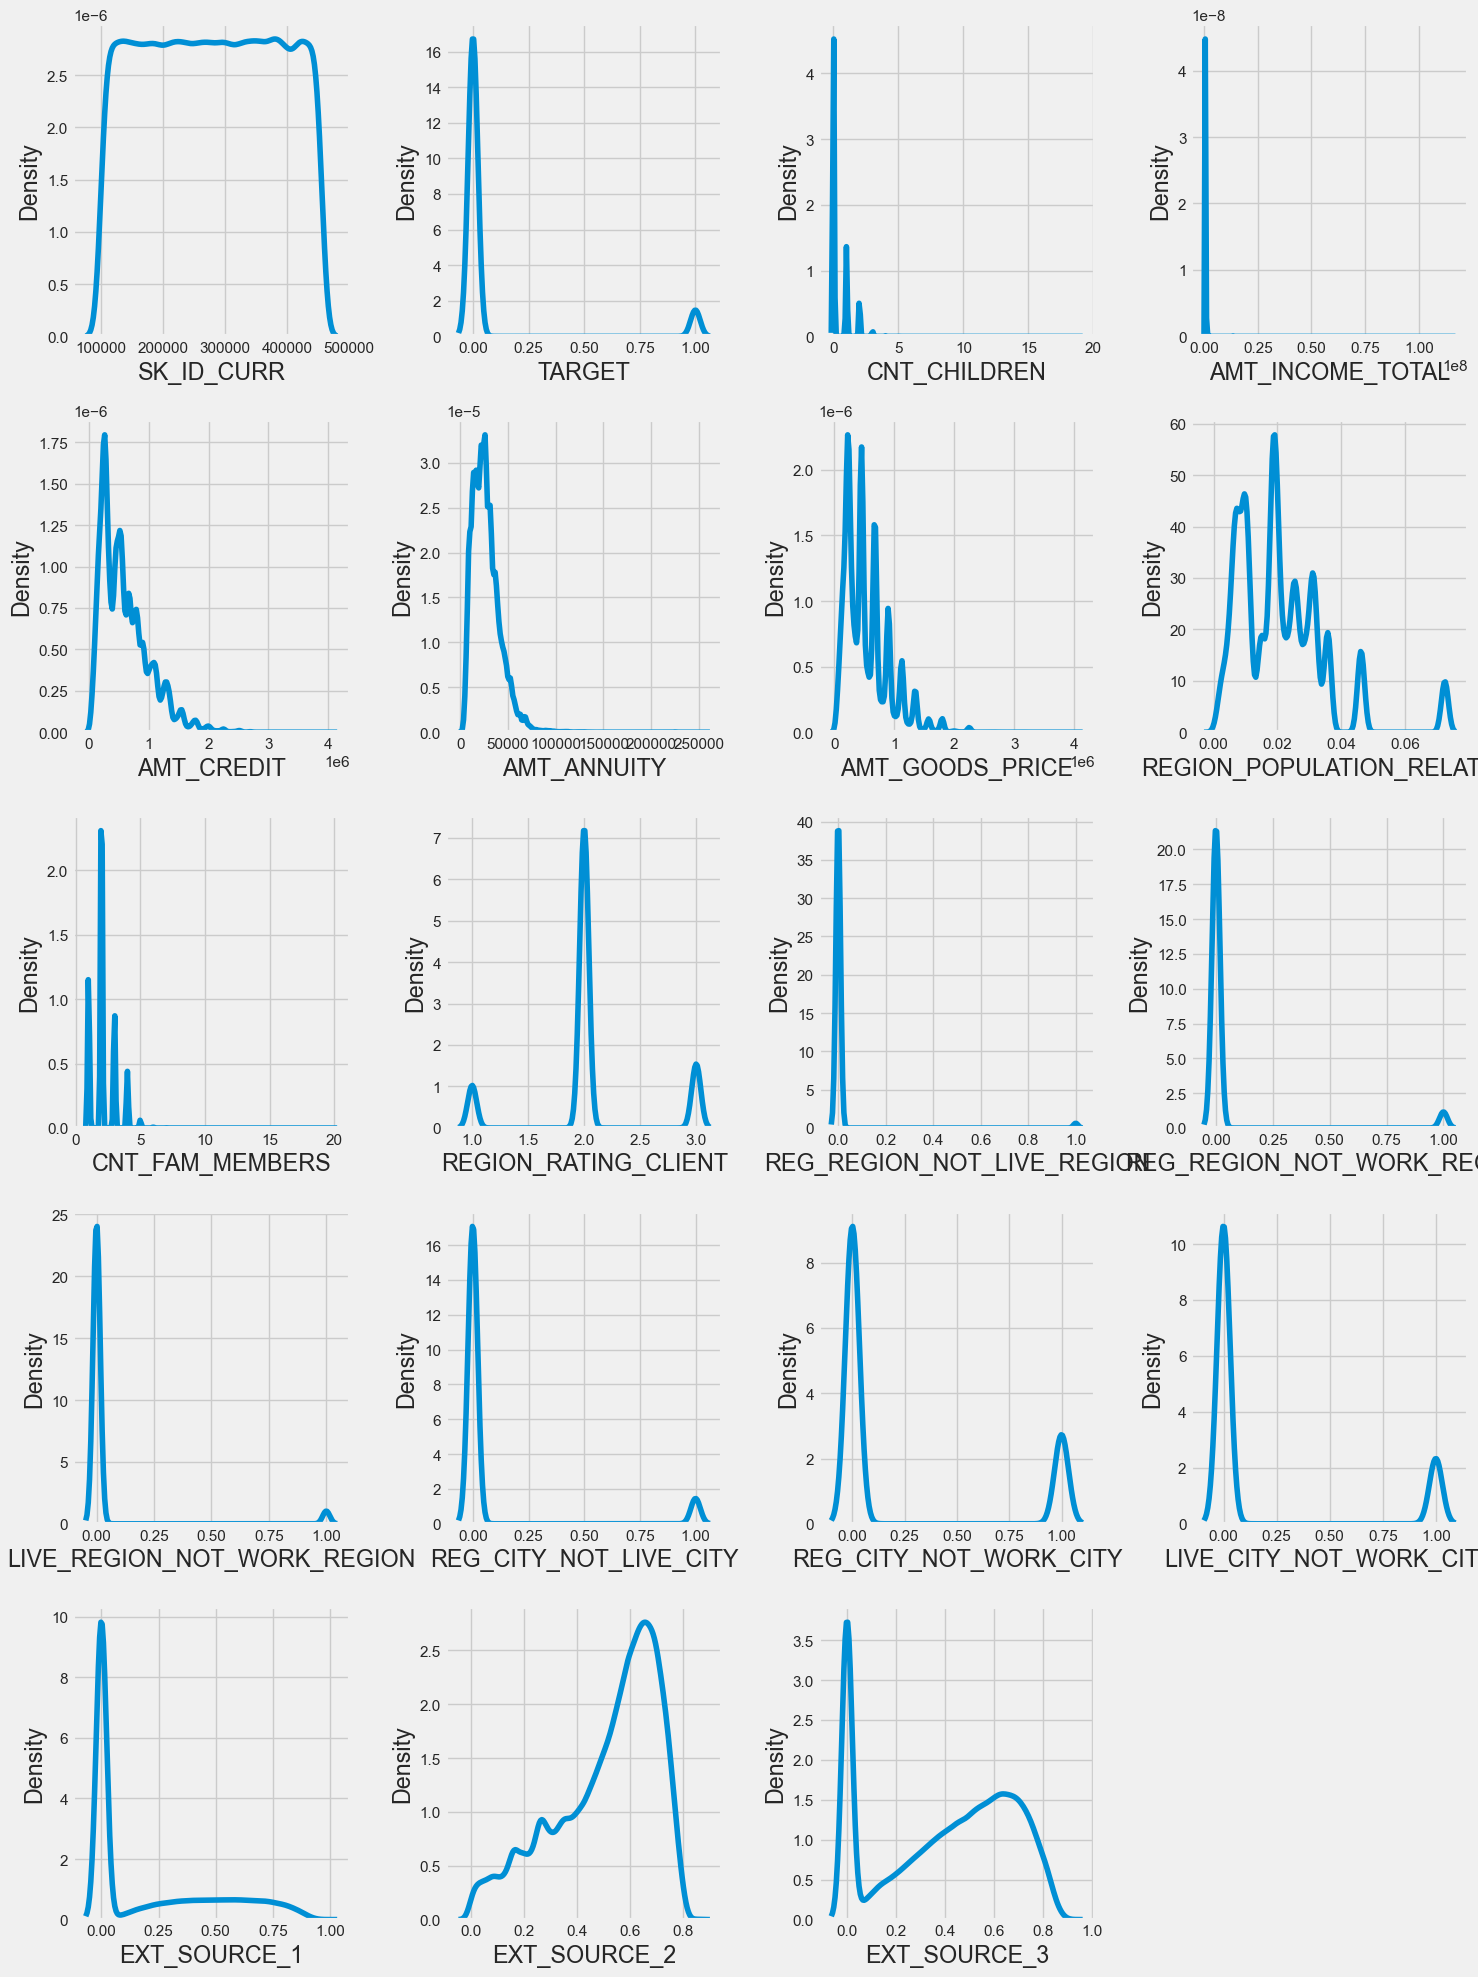

In [206]:
plt.figure(figsize= (15, 20))
for i in range(len(nums)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x = dataframe_preprocess[nums[i]])
    plt.tight_layout()

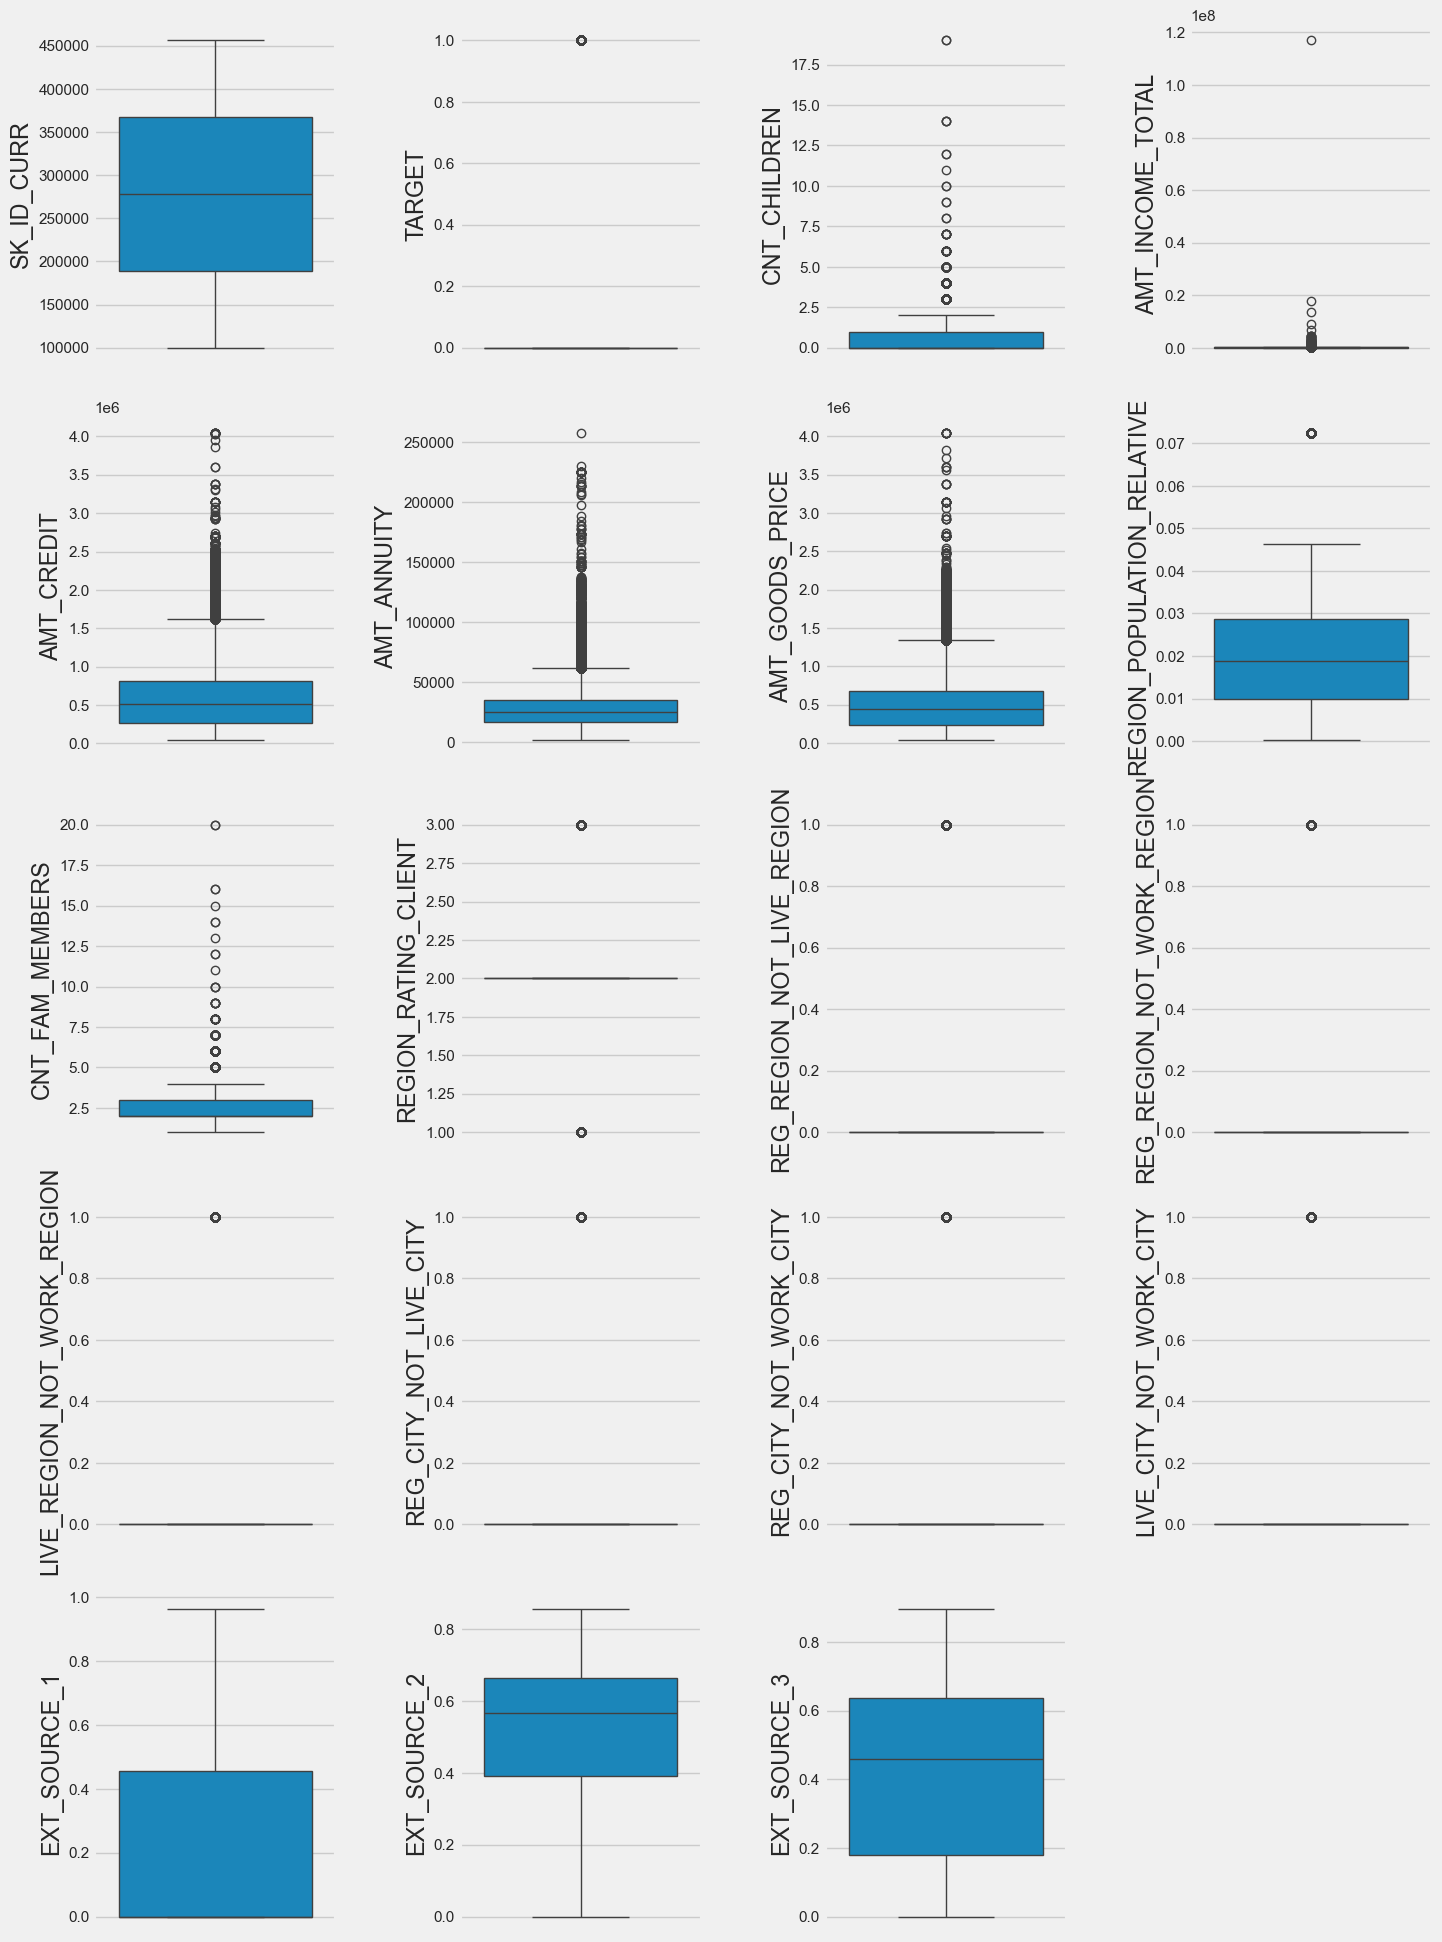

In [207]:
plt.figure(figsize= (15, 20))
for i in range(len(nums)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y = dataframe_preprocess[nums[i]], orient= 'v')
    plt.tight_layout(pad=2)

Terdapat outlier pada kolom `CNT_CHILDREN`, `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE` dan `CNT_FAM_MEMBERS`, yang dimana nanti akan dilakukan penghapusan outliers.

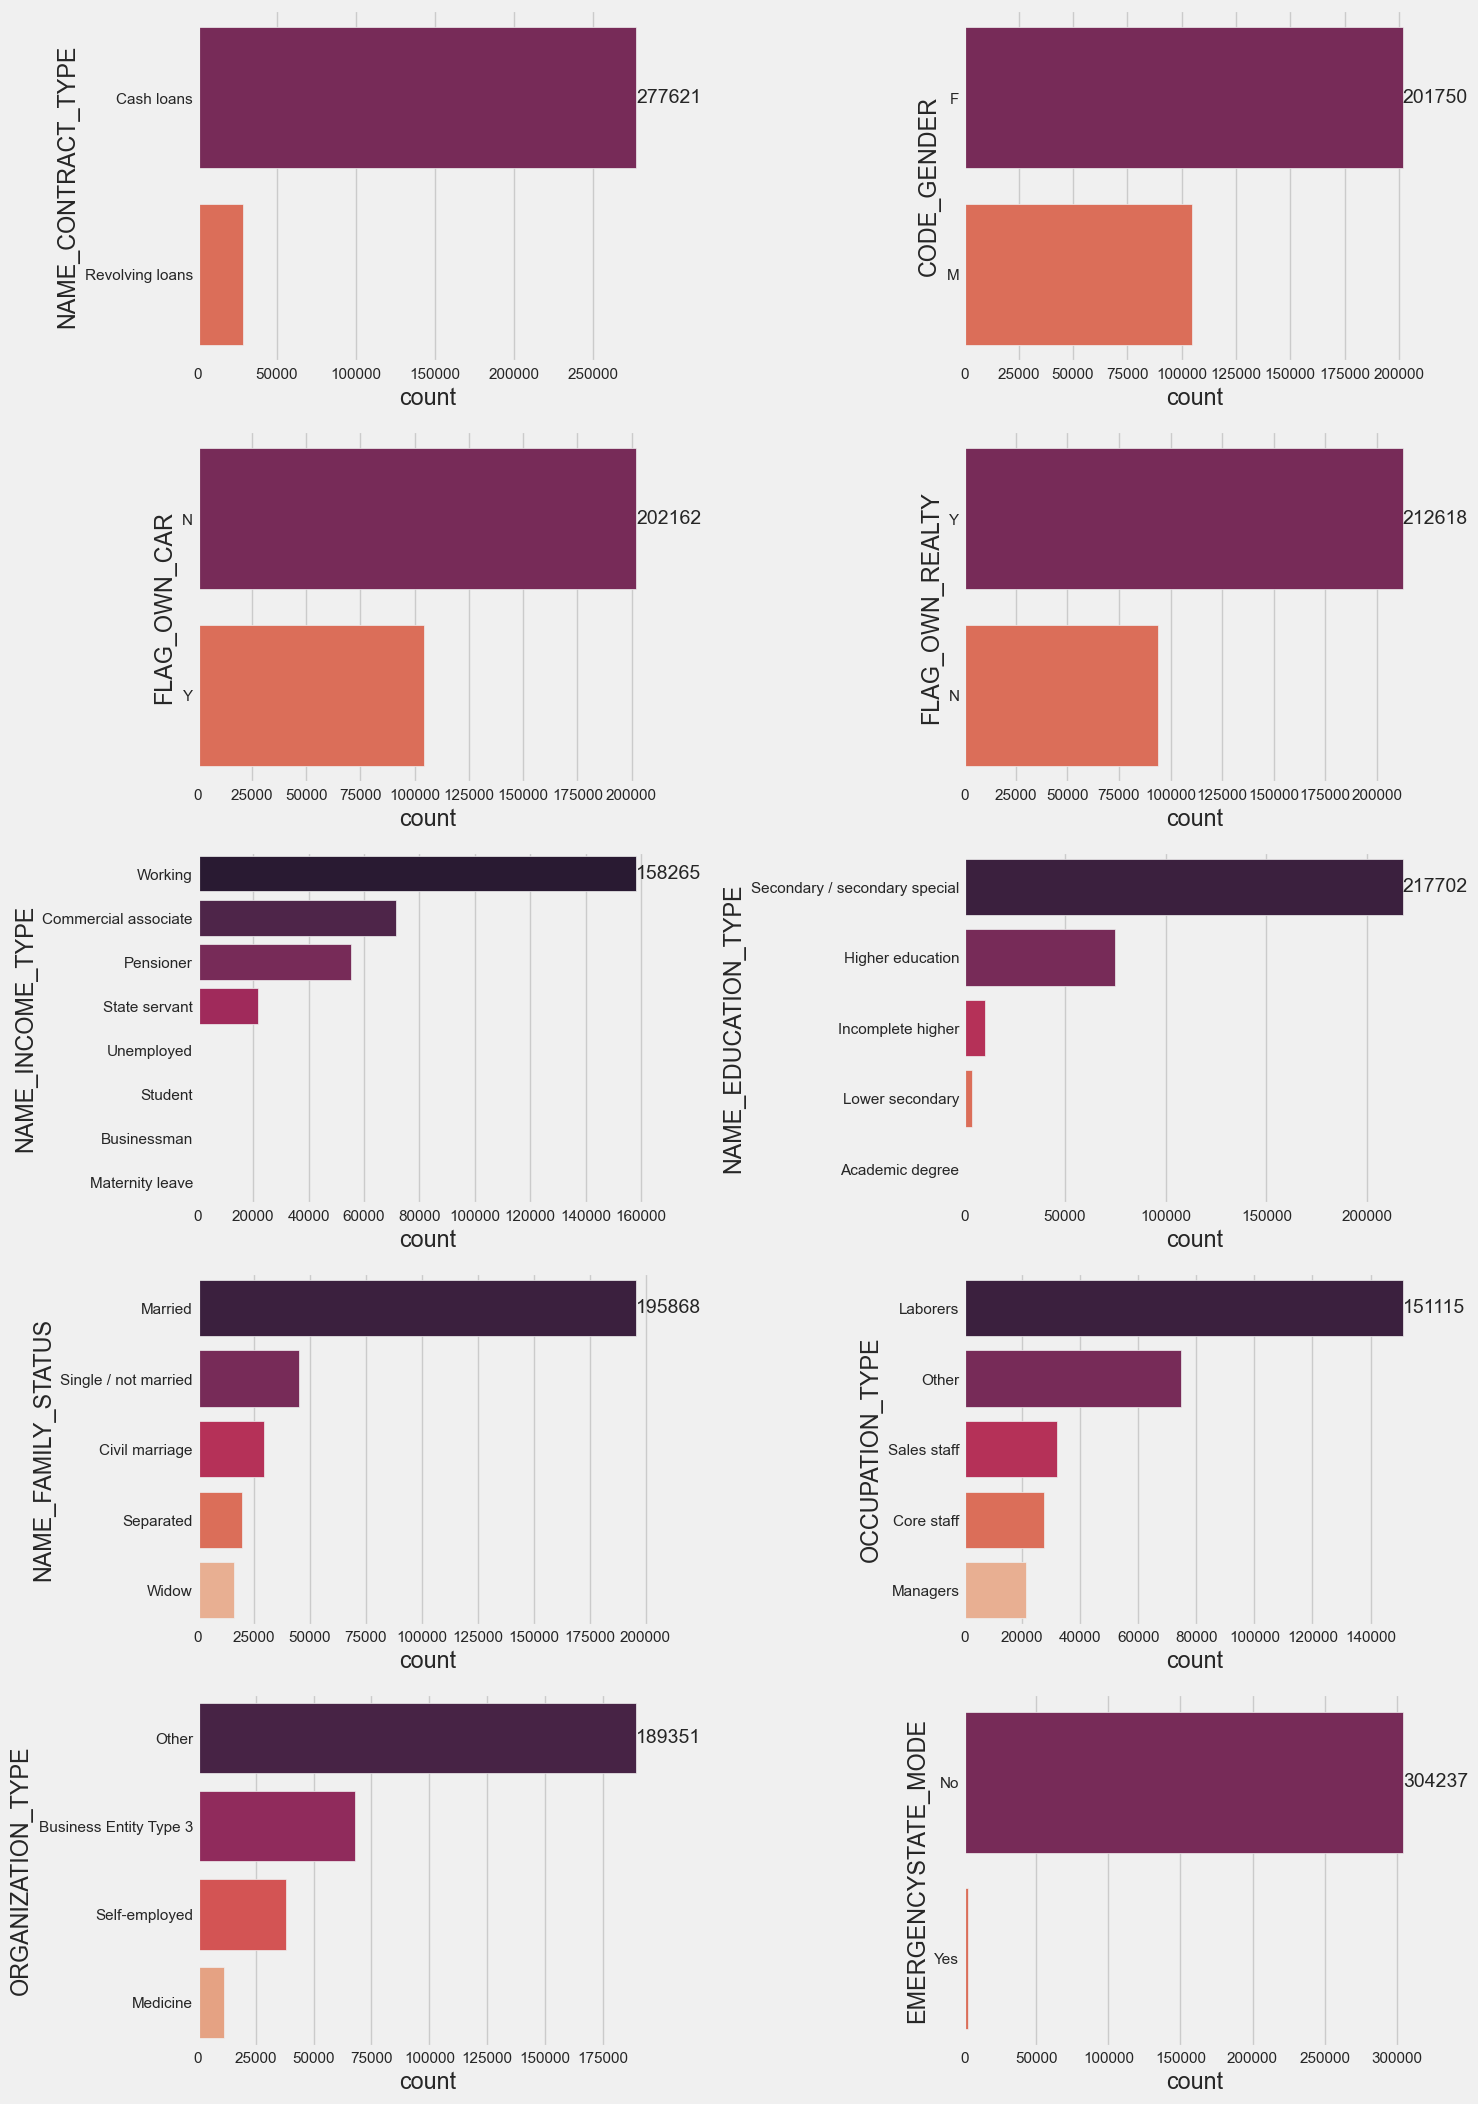

In [208]:
plt.figure(figsize=(15, 25))
for i in range(len(cats)):
    plt.subplot(6, 2, i+1)
    ax = sns.countplot(y=cats[i], data=dataframe_preprocess, palette='rocket', order=dataframe_preprocess[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

**Multivariate Analysis**

---

<Axes: >

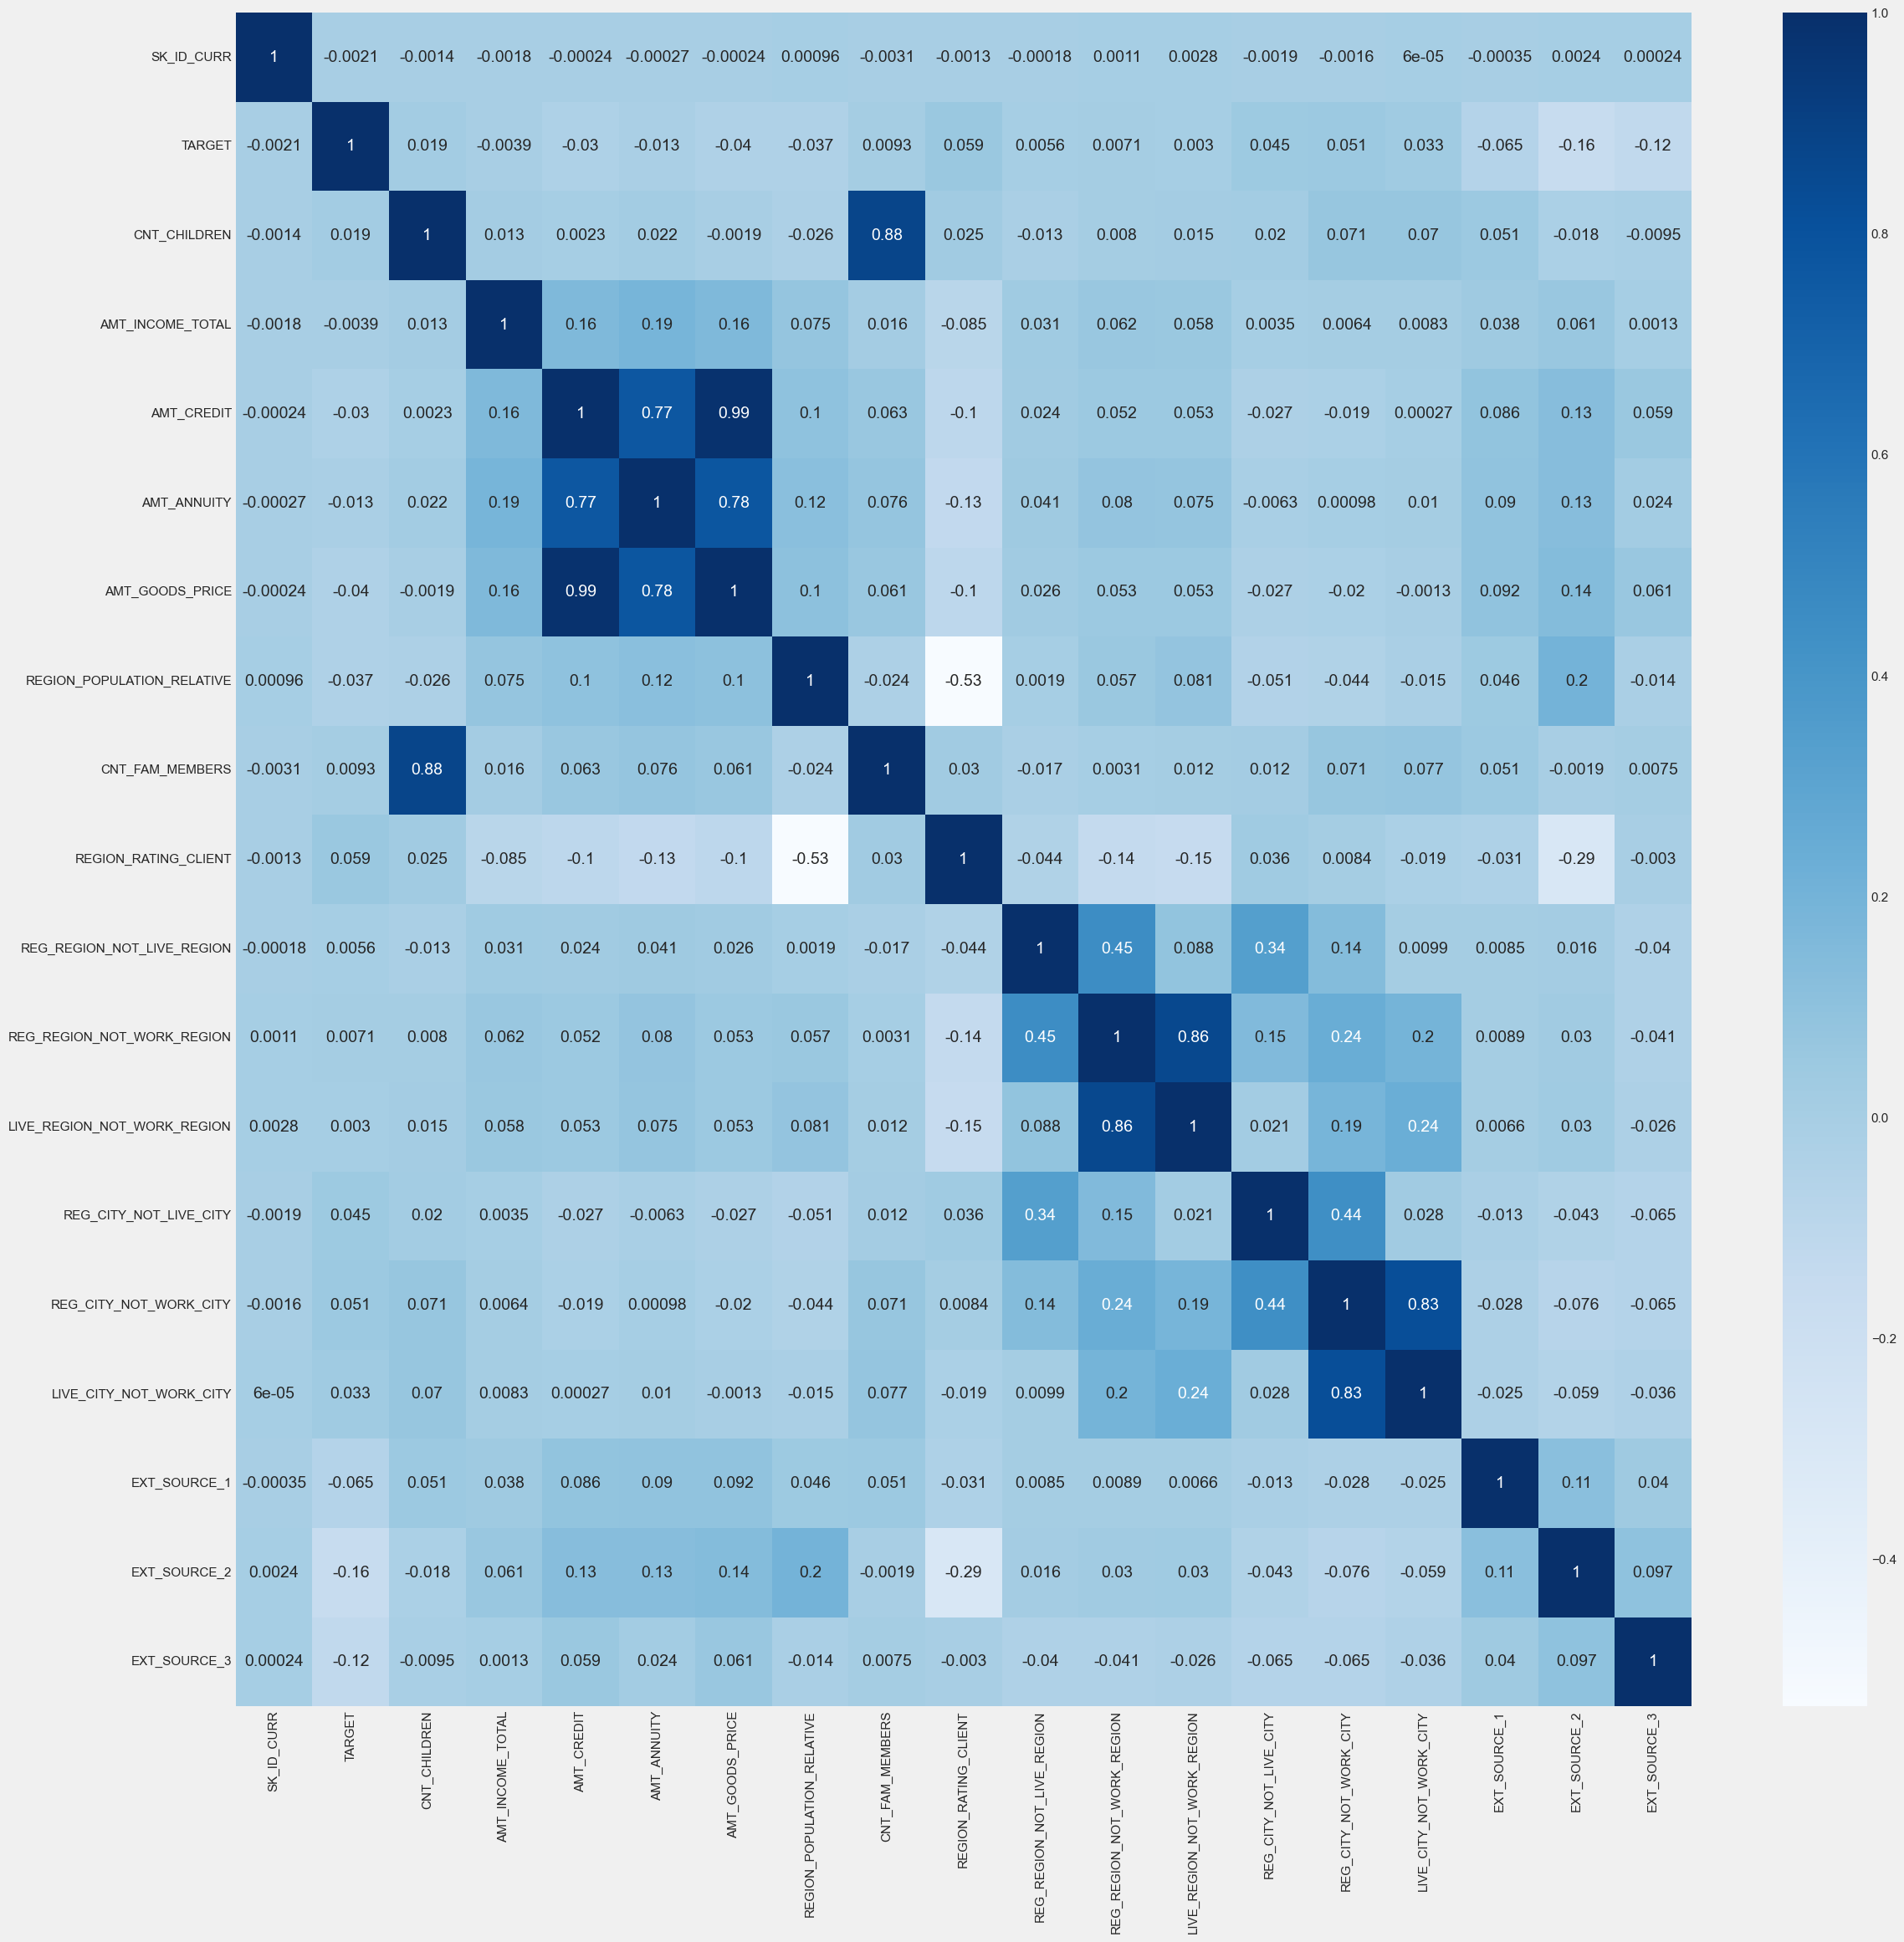

In [209]:
plt.figure(figsize=(25, 25))
sns.heatmap(dataframe_preprocess[nums].corr(), annot=True, cmap='Blues')

`AMT_ANNUITY` & `AMT_CREDIT` memiliki korelasi yang sangat kuat. Ini berarti bahwa Semakin besar pinjaman, semakin besar pula pembayaran anuitasnya. Hal ini wajar karena anuitas dihitung berdasarkan jumlah pinjaman dan tingkat bunga. Namun salah satu akan dihapus karna dapat menyebabkan redundan.

`AMT_ANNUITY` & `AMT_GOODS_PRICE` memiliki korelasi yang sangat kuat. Ini berarti bahwa Individu yang membeli barang dengan harga yang lebih mahal cenderung memiliki pinjaman yang lebih besar dan pembayaran anuitas yang lebih tinggi.

`AMT_CREDIT` & `AMT_GOODS_PRICE` memiliki korelasi yang sangat kuat. Ini berarti bahwa Individu dengan pendapatan yang lebih tinggi mungkin membeli barang dengan harga yang lebih mahal, memiliki pinjaman yang lebih besar.

In [210]:
corr_matrix = dataframe_preprocess[nums].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [211]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY']

In [212]:
dataframe_preprocess.drop(to_drop_hicorr, axis=1, inplace=True)

**Check Categorical Features**

---

In [ ]:
dataframe_preprocess.select_dtypes(include='object').nunique()

In [ ]:
dataframe_preprocess.select_dtypes(exclude='object').nunique()

## **Feature Engineering**

---

In [213]:
dataframe_fe = dataframe_preprocess.copy()

**Feature Encoding**

---

In [214]:
for cats in ['NAME_CONTRACT_TYPE']:
  onehots = pd.get_dummies(dataframe_fe[cats], prefix=cats)
  dataframe_fe = dataframe_fe.join(onehots)

In [215]:
mapping_grade = {
    'Lower secondary' : 1,
    'Secondary / secondary special' : 2,
    'Incomplete higher' : 3,
    'Higher education' : 4,
    'Academic degree' : 5}

dataframe_fe['NAME_EDUCATION_TYPE'] = dataframe_fe['NAME_EDUCATION_TYPE'].map(mapping_grade)

In [216]:
dataframe_fe['NAME_INCOME_TYPE'] = dataframe_fe['NAME_INCOME_TYPE'].astype('category').cat.codes
dataframe_fe['CODE_GENDER'] = dataframe_fe['CODE_GENDER'].astype('category').cat.codes
dataframe_fe['FLAG_OWN_CAR'] = dataframe_fe['FLAG_OWN_CAR'].astype('category').cat.codes
dataframe_fe['FLAG_OWN_REALTY'] = dataframe_fe['FLAG_OWN_REALTY'].astype('category').cat.codes
dataframe_fe['EMERGENCYSTATE_MODE'] = dataframe_fe['EMERGENCYSTATE_MODE'].astype('category').cat.codes
dataframe_fe['OCCUPATION_TYPE'] = dataframe_fe['OCCUPATION_TYPE'].astype('category').cat.codes
dataframe_fe['NAME_FAMILY_STATUS'] = dataframe_fe['NAME_FAMILY_STATUS'].astype('category').cat.codes
dataframe_fe['ORGANIZATION_TYPE'] = dataframe_fe['ORGANIZATION_TYPE'].astype('category').cat.codes


**Class Imbalance**

---

In [217]:
# Melihat berapa dejarat ketimpangan pada class

for i in range(len(dataframe_fe['TARGET'].value_counts())):
    a = round(dataframe_fe['TARGET'].value_counts()[i]/dataframe_fe.shape[0]*100,2)
    print(f'{a}%')

print('Degree of Imbalance dari data ini termasuk pada Moderate Imbalance')

91.93%
8.07%
Degree of Imbalance dari data ini termasuk pada Moderate Imbalance


In [218]:
# Membuat kolom baru untuk melihat Class 'Yes'

dataframe_fe['Target_class'] = dataframe_fe['TARGET']==1
dataframe_fe['Target_class'].value_counts()

Target_class
False    281806
True      24752
Name: count, dtype: int64

In [219]:
# Memisahkan dataframe tanpa Response dan Res_class dan hanya Res_class
X = dataframe_fe[[col for col in dataframe_fe.columns if (str(dataframe_fe[col].dtype) != 'object') and col not in ['TARGET', 'Target_class']]]
y = dataframe_fe['Target_class'].values
print(X.shape)
print(y.shape)

(306558, 24)
(306558,)


In [220]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.3, random_state=99).fit_resample(X, y)

In [221]:
pd.Series(y_over_SMOTE).value_counts()

False    281806
True      84541
Name: count, dtype: int64

In [222]:
X_over_SMOTE['TARGET'] = y_over_SMOTE.astype(int)
dataframe_fe = X_over_SMOTE.copy()

In [223]:
# Memisahkan dataframe tanpa Response dan Res_class dan hanya Res_class
dataframe_fe['Target_class'] = dataframe_fe['TARGET']==1
dataframe_fe['Target_class'].value_counts()
X2 = dataframe_fe[[col for col in dataframe_fe.columns if (str(dataframe_fe[col].dtype) != 'object') and col not in ['TARGET', 'Target_class']]]
y2 = dataframe_fe['Target_class'].values
print(X2.shape)
print(y2.shape)

(366347, 24)
(366347,)


In [224]:
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=1, random_state=99).fit_resample(X2, y2)

In [225]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING SMOTE & UNDERSAMPLING')
print('')
print(pd.Series(y_under).value_counts())

Original
False    281806
True      24752
Name: count, dtype: int64


OVERSAMPLING SMOTE & UNDERSAMPLING

False    84541
True     84541
Name: count, dtype: int64


In [226]:
X_under['TARGET'] = y_under.astype(int)
dataframe_fe = X_under.copy()

**Handling Outliers**

---

In [227]:
outliers = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT']

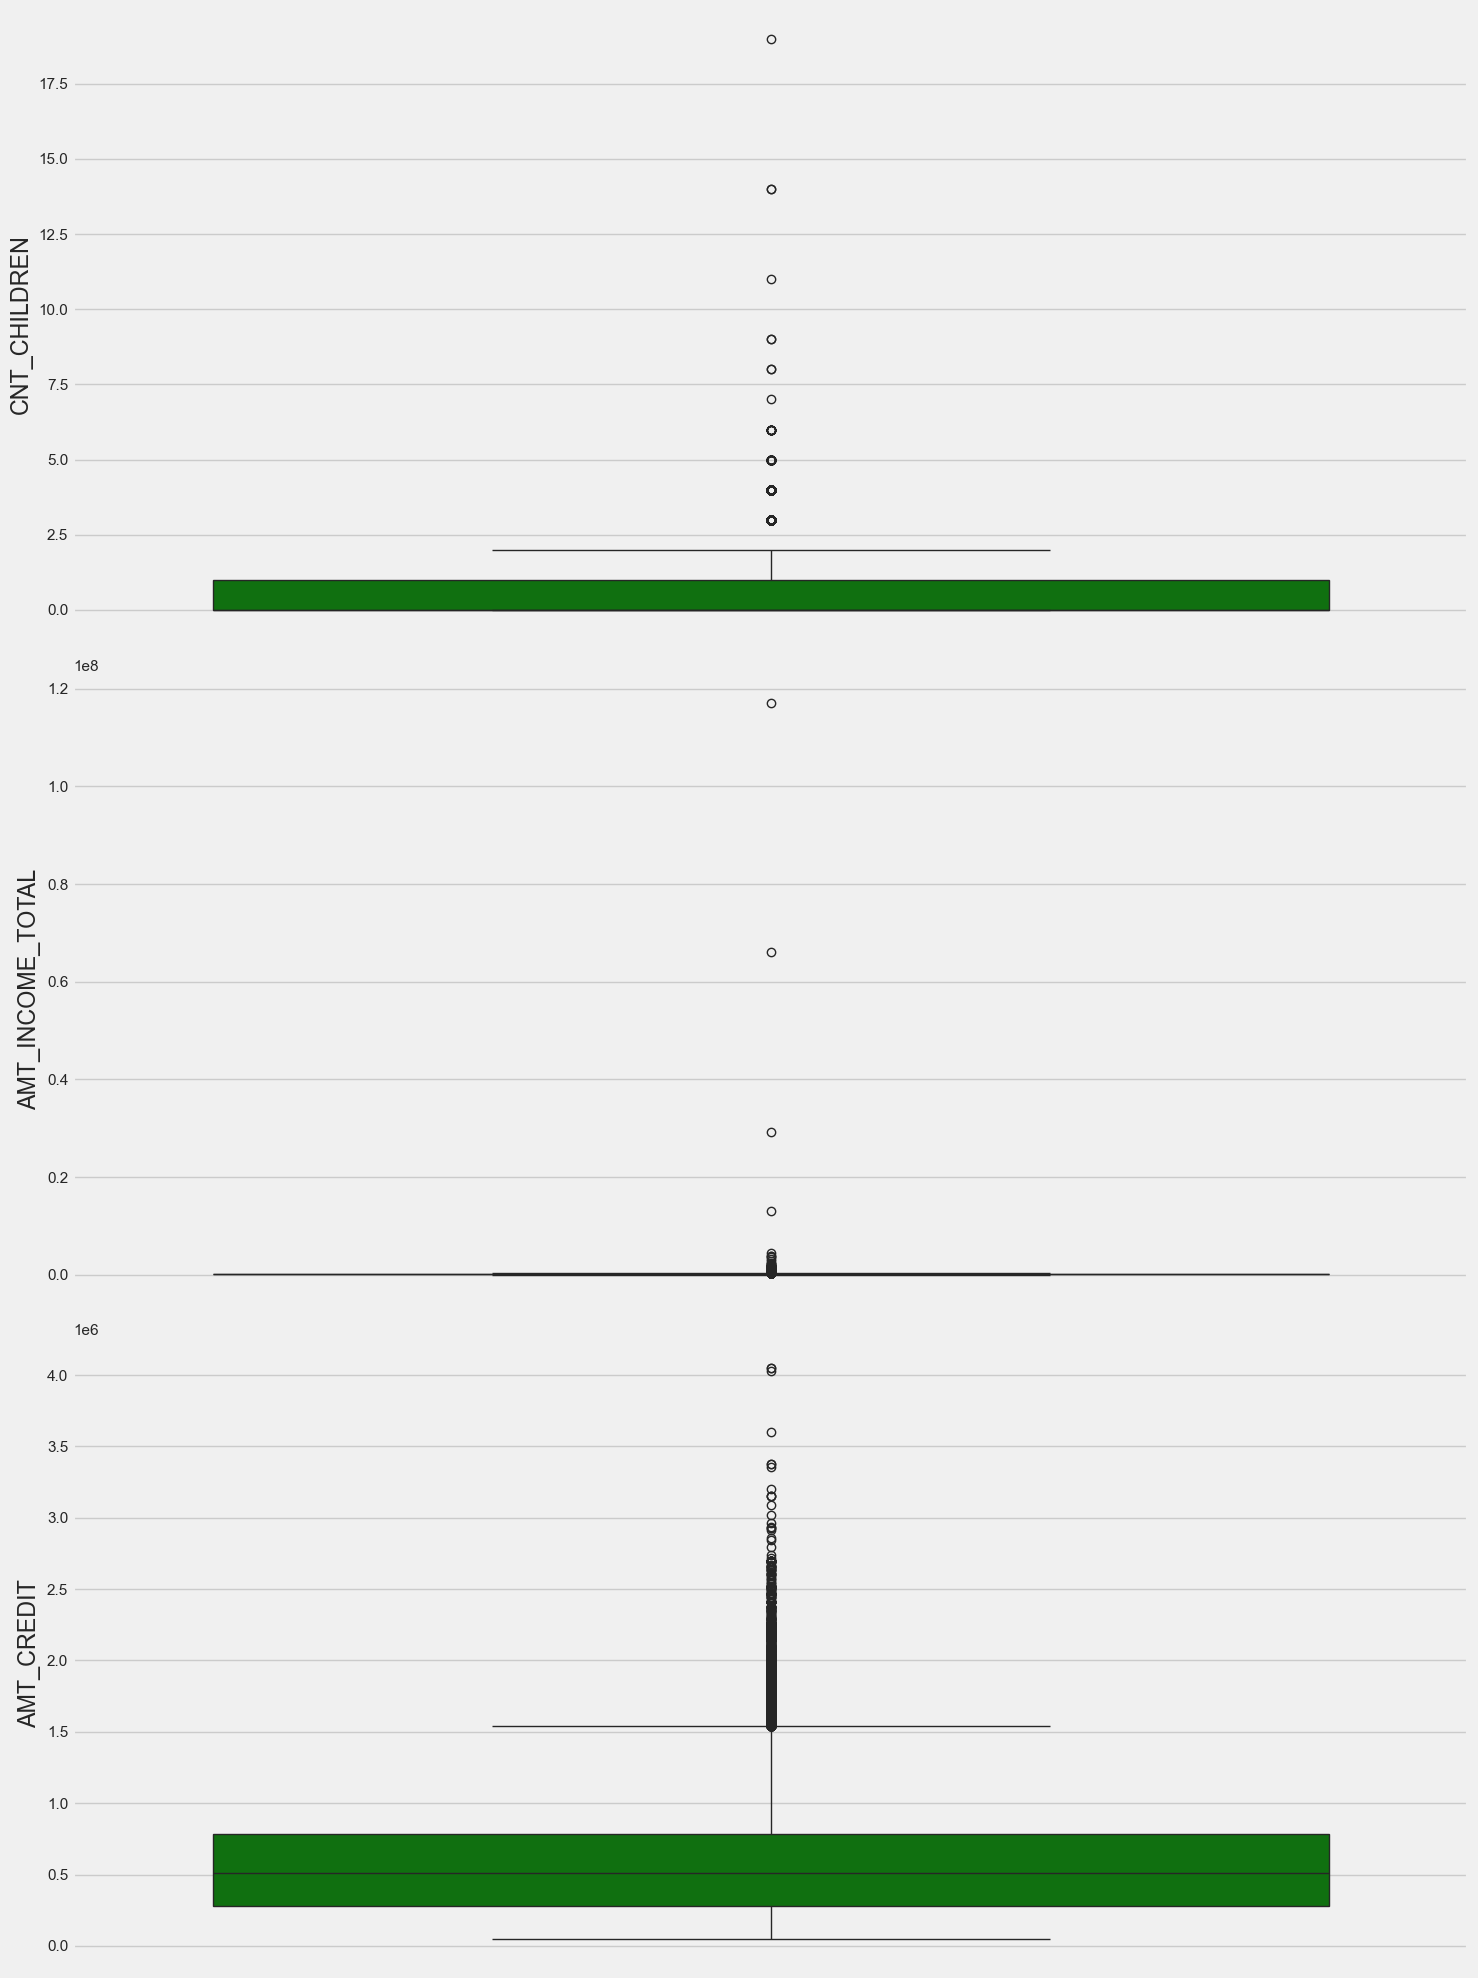

In [228]:
plt.figure(figsize= (15, 20))
for i in range(len(outliers)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(y=dataframe_fe[outliers[i]], color='green',orient='v')
    plt.tight_layout()

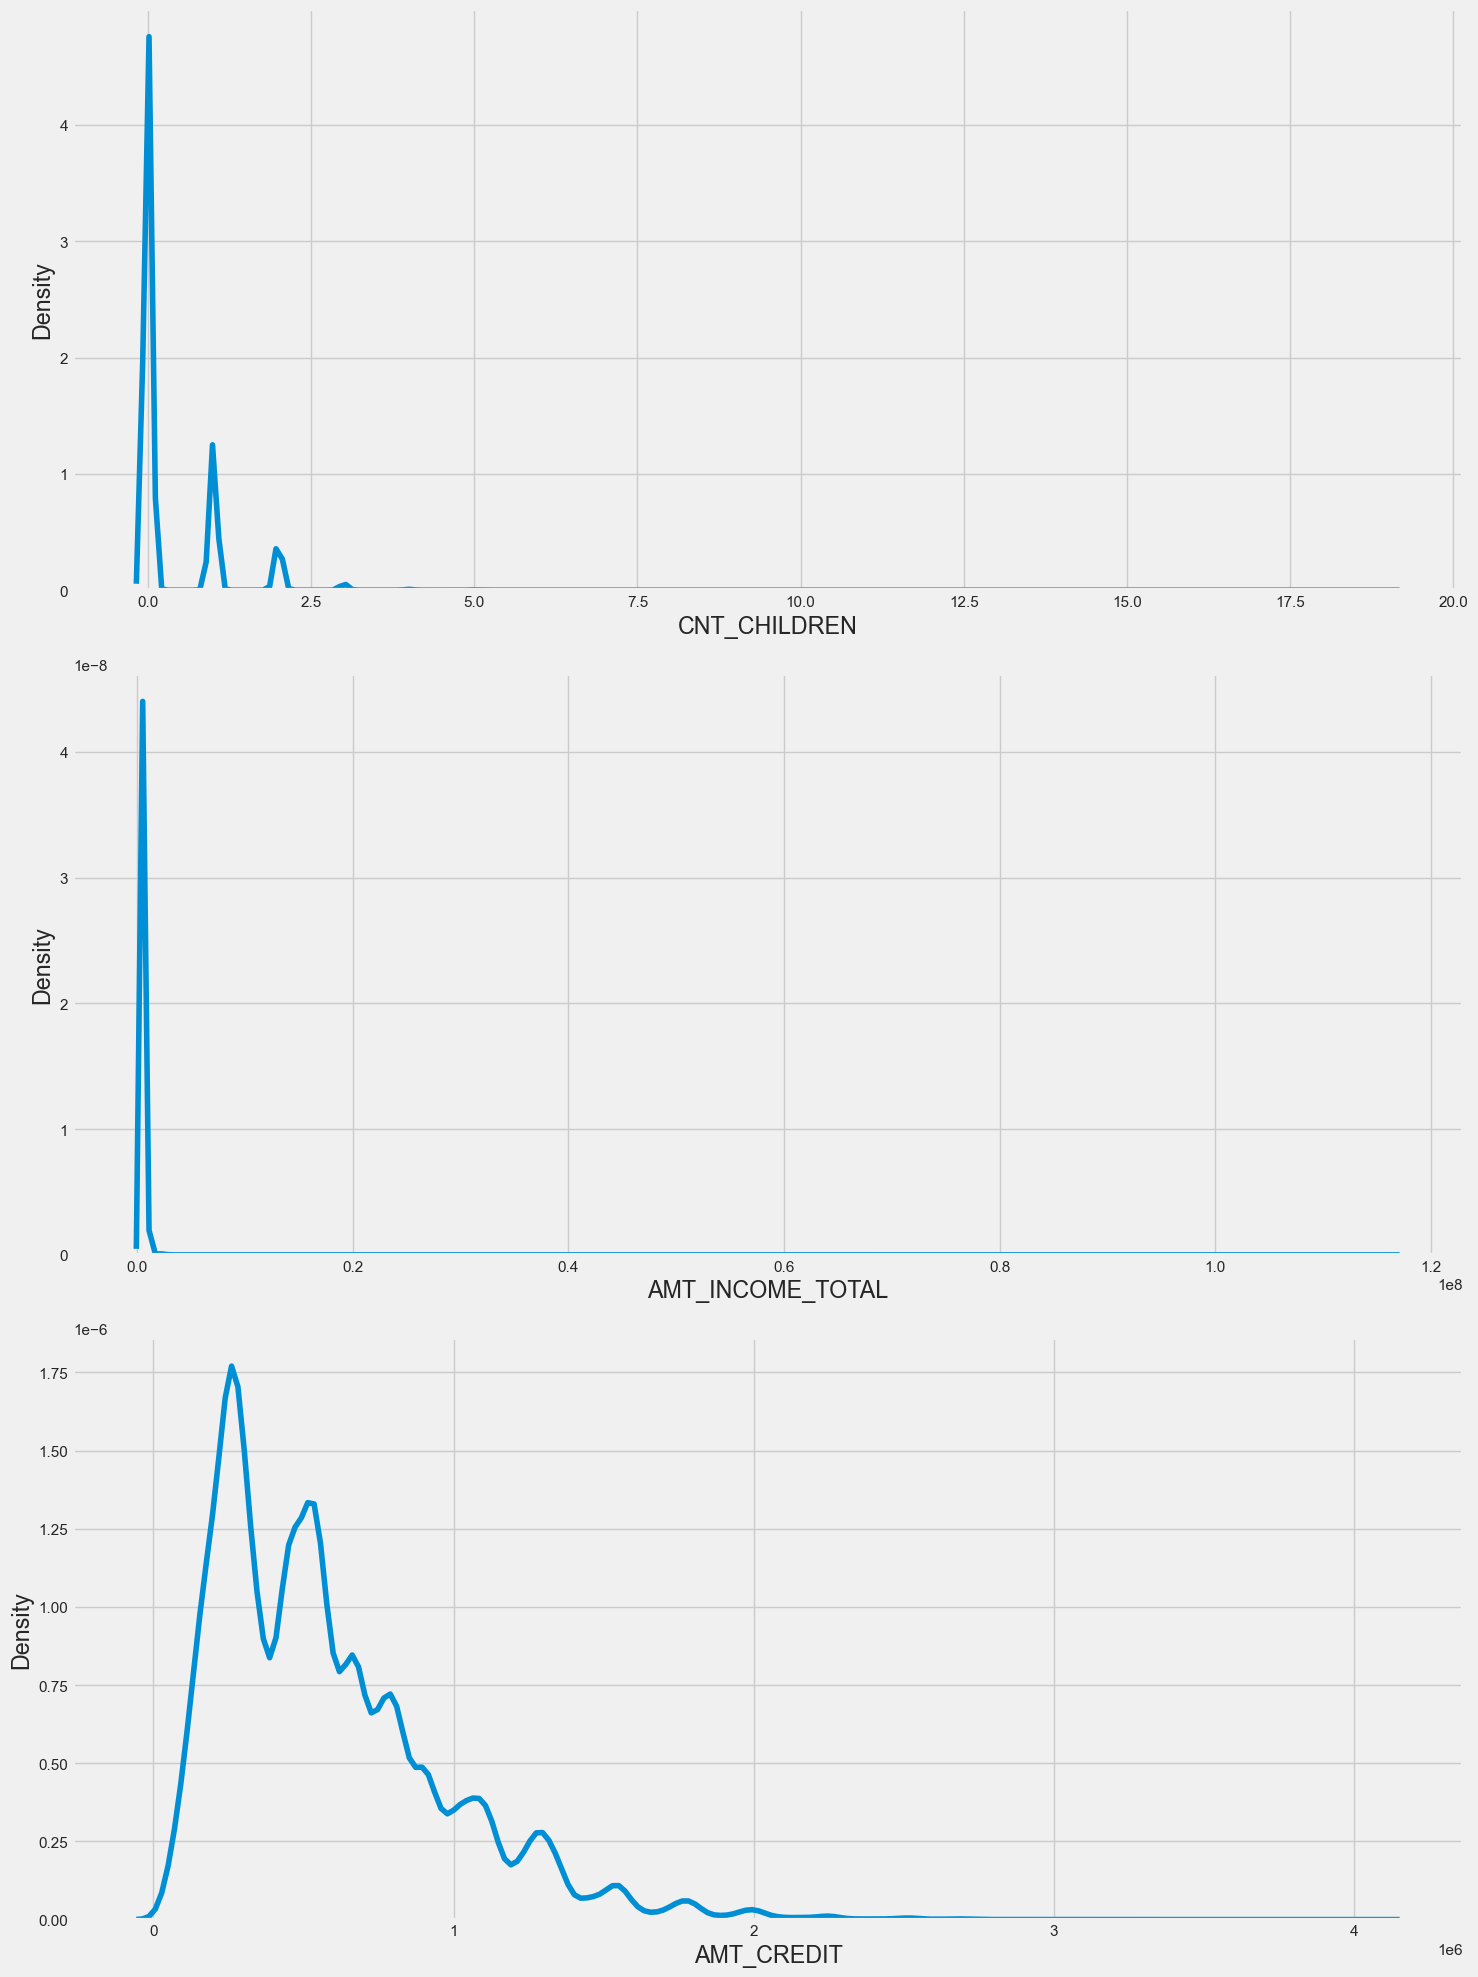

In [229]:
plt.figure(figsize= (15, 20))
for i in range(len(outliers)):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(x = dataframe_fe[outliers[i]])
    plt.tight_layout()

In [230]:
print(f'Jumlah baris sebelum memfilter outlier: {len(dataframe_fe)}')

cleaning_outliers = np.array([True] * len(dataframe_fe))
for col in outliers:
    Q1 = dataframe_fe[col].quantile(0.25)
    Q3 = dataframe_fe[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    cleaning_outliers = ((dataframe_fe[col] >= low_limit) & (dataframe_fe[col] <= high_limit)) & cleaning_outliers
    
dataframe_fe = dataframe_fe[cleaning_outliers]

print(f'Jumlah baris setelah memfilter outlier: {len(dataframe_fe)}')

Jumlah baris sebelum memfilter outlier: 169082
Jumlah baris setelah memfilter outlier: 157513


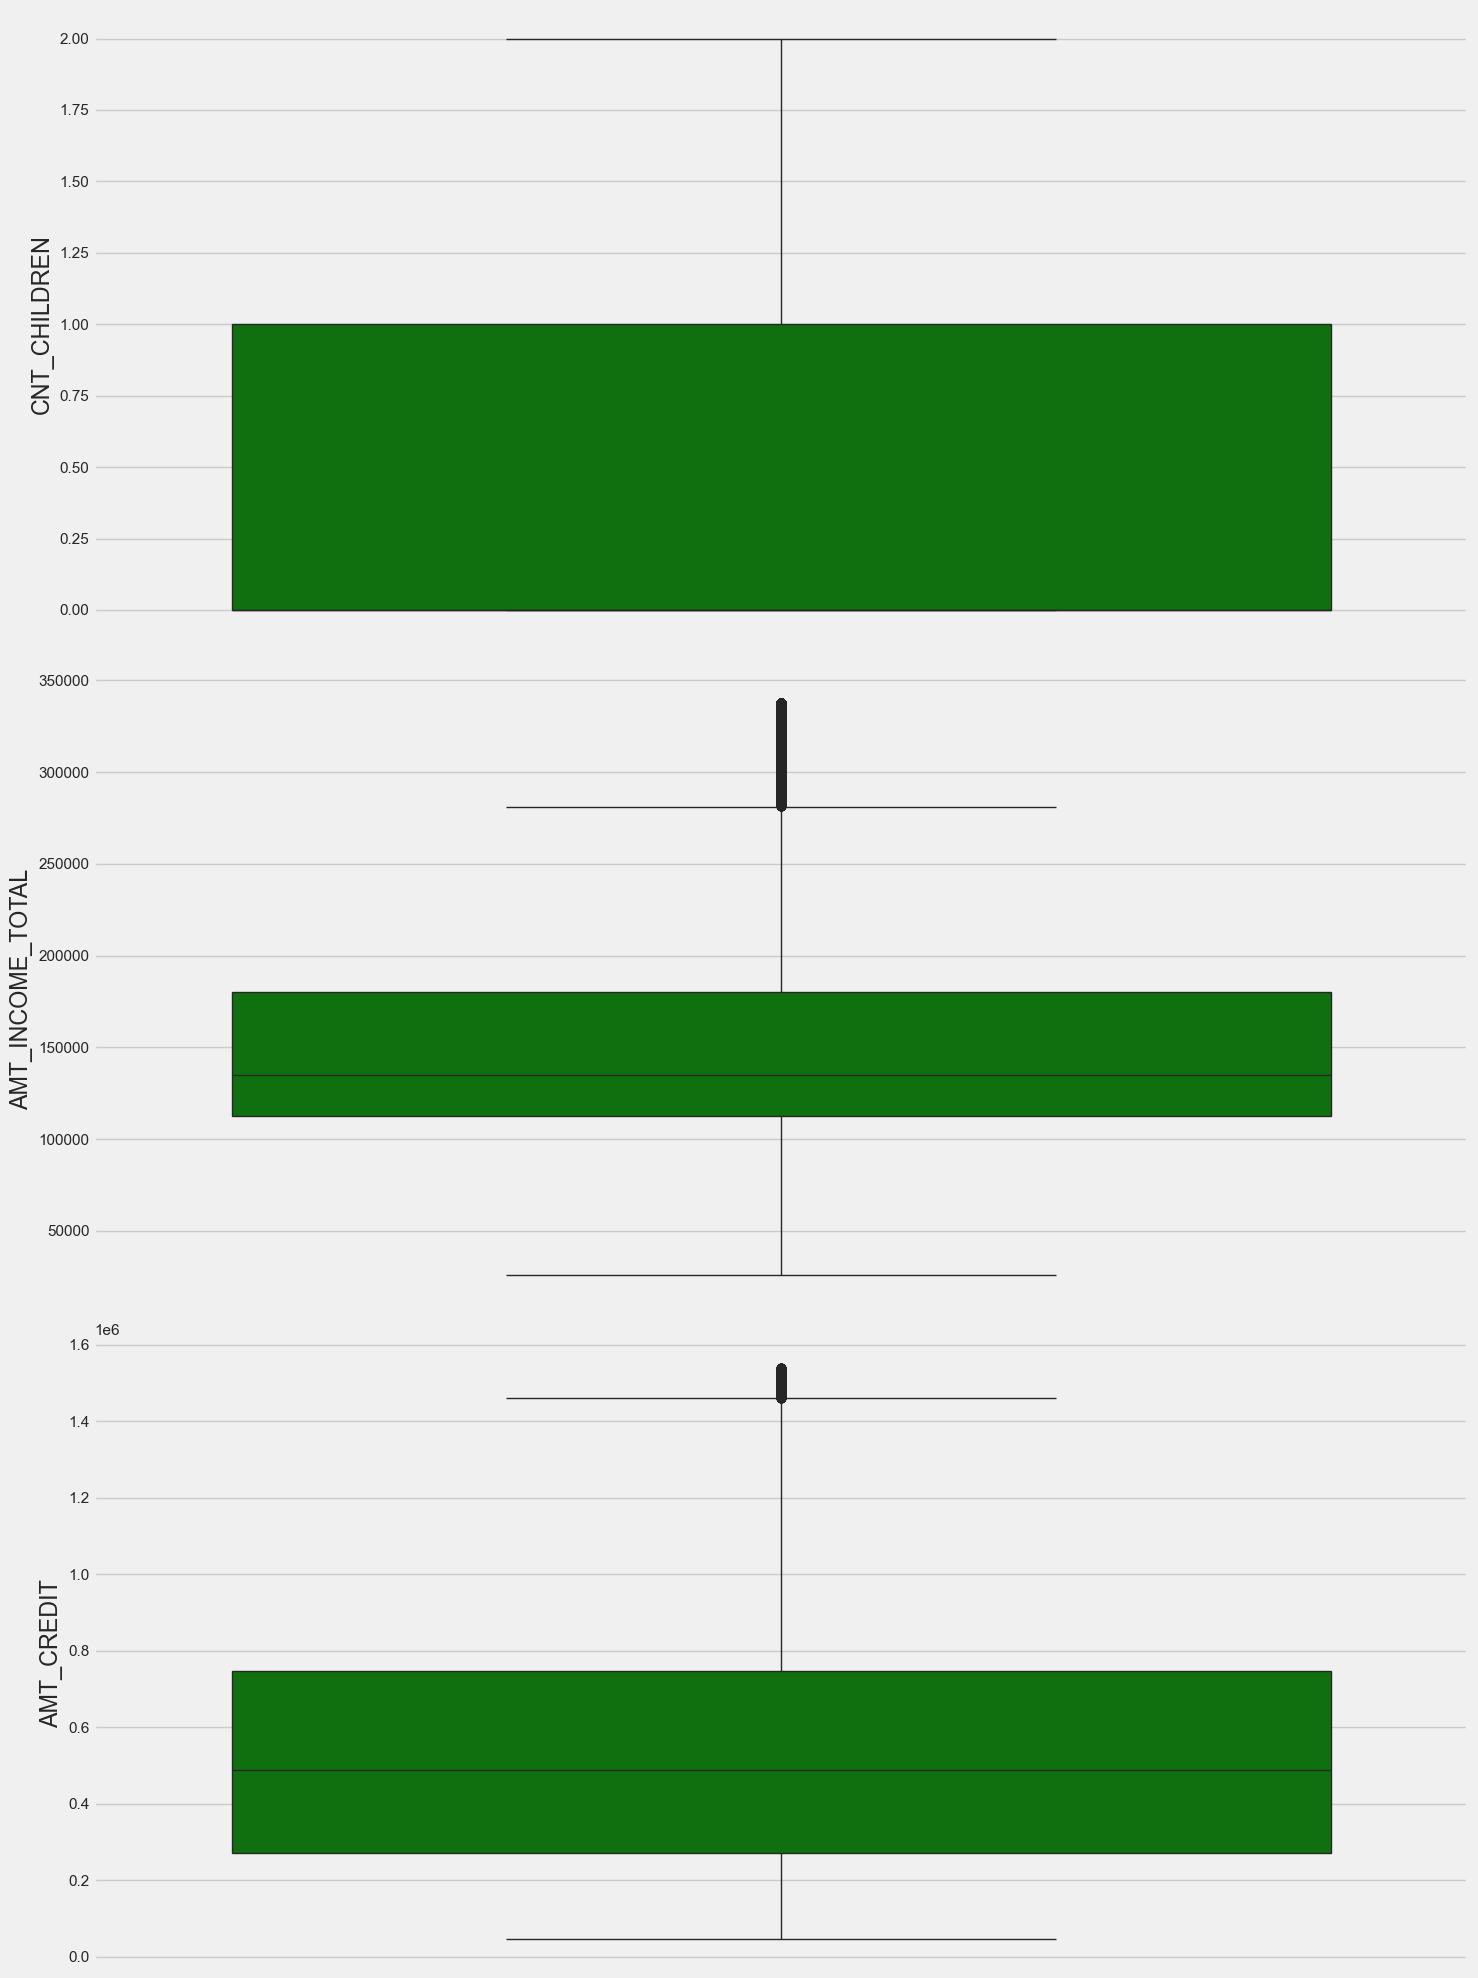

In [231]:
outliers = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT']

plt.figure(figsize= (15, 20))
for i in range(len(outliers)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(y=dataframe_fe[outliers[i]], color='green',orient='v')
    plt.tight_layout()

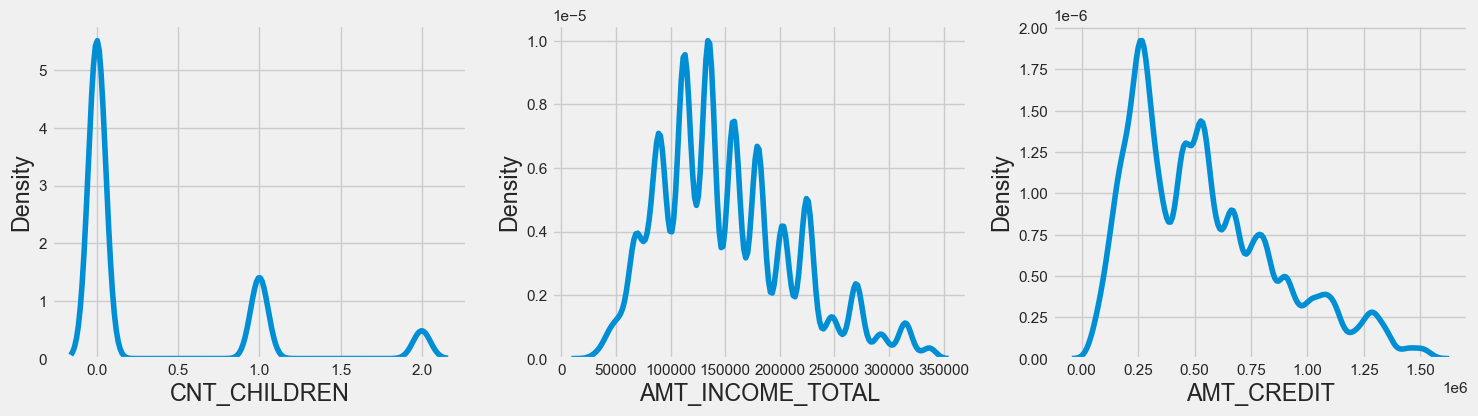

In [232]:
plt.figure(figsize= (15, 20))
for i in range(len(outliers)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = dataframe_fe[outliers[i]])
    plt.tight_layout()

In [233]:
dataframe_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157513 entries, 8912 to 366346
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          157513 non-null  int64  
 1   CODE_GENDER                         157513 non-null  int8   
 2   FLAG_OWN_CAR                        157513 non-null  int8   
 3   FLAG_OWN_REALTY                     157513 non-null  int8   
 4   CNT_CHILDREN                        157513 non-null  int64  
 5   AMT_INCOME_TOTAL                    157513 non-null  float64
 6   AMT_CREDIT                          157513 non-null  float64
 7   NAME_INCOME_TYPE                    157513 non-null  int8   
 8   NAME_EDUCATION_TYPE                 157513 non-null  int64  
 9   NAME_FAMILY_STATUS                  157513 non-null  int8   
 10  REGION_POPULATION_RELATIVE          157513 non-null  float64
 11  OCCUPATION_TYPE             

# **Modeling**

---

In [234]:
dataframe_model = dataframe_fe.copy()

In [235]:
drop_columns = ['SK_ID_CURR','EMERGENCYSTATE_MODE','AMT_INCOME_TOTAL','FLAG_OWN_REALTY','CODE_GENDER','TARGET','CNT_CHILDREN','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']

In [236]:
# ,'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY'

Drop kolom yang tidak diperlukan atau kolom yang tidak terlalu berpengaruh pada performa model. Jadi kolom yang di drop diatas tidak semata-mata dipilih begitu saja, saya sudah berkali-kali menguji performa model dan melihat beberapa feature yang tidak terlalu berpengaruh terhadap performa model.

In [237]:
dataframe_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157513 entries, 8912 to 366346
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          157513 non-null  int64  
 1   CODE_GENDER                         157513 non-null  int8   
 2   FLAG_OWN_CAR                        157513 non-null  int8   
 3   FLAG_OWN_REALTY                     157513 non-null  int8   
 4   CNT_CHILDREN                        157513 non-null  int64  
 5   AMT_INCOME_TOTAL                    157513 non-null  float64
 6   AMT_CREDIT                          157513 non-null  float64
 7   NAME_INCOME_TYPE                    157513 non-null  int8   
 8   NAME_EDUCATION_TYPE                 157513 non-null  int64  
 9   NAME_FAMILY_STATUS                  157513 non-null  int8   
 10  REGION_POPULATION_RELATIVE          157513 non-null  float64
 11  OCCUPATION_TYPE             

In [238]:
# Pisahkan fitur dan target
X = dataframe_model.drop(drop_columns, axis=1)
y = dataframe_model['TARGET']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [239]:
X_test.head()

,FLAG_OWN_CAR,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans
345107,0,288106.330096,4,1,3,0.008963,1,1,0,0,1,0.442674,0.411112,0.198168,True,False
228129,0,405000.000000,1,4,1,0.015221,2,2,0,0,3,0.000000,0.263144,0.812823,False,True
21148,0,450000.000000,7,3,1,0.030755,4,2,0,0,3,0.000000,0.758992,0.799297,False,True
287934,1,840996.000000,7,2,1,0.018634,3,2,0,0,0,0.000000,0.674126,0.703203,True,False
333515,0,450000.000000,7,4,1,0.028031,1,2,0,0,1,0.200969,0.595089,0.536179,True,False


In [240]:
X_train.head()

,FLAG_OWN_CAR,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans
26796,1,4.275000e+05,7,2,1,0.006629,3,2,1,1,2,0.000000,0.653305,0.345785,True,False
27970,0,1.006920e+06,7,4,1,0.010147,0,2,0,1,2,0.000000,0.495721,0.643026,True,False
107251,0,6.014700e+05,3,2,1,0.025164,1,2,1,0,2,0.843778,0.261185,0.570917,True,False
338631,0,2.879869e+05,7,2,1,0.009652,2,2,0,1,1,0.000000,0.179062,0.389915,True,False
343751,0,3.400883e+05,4,2,3,0.018182,2,2,0,0,1,0.085125,0.310189,0.296025,True,False


In [241]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

lg = LogisticRegression(random_state=99)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=99)
xgb = XGBClassifier(random_state=99)
rf = RandomForestClassifier(random_state=99)
lgb = LGBMClassifier(random_state=99)
grd = GradientBoostingClassifier(random_state=99)

### **Logistic Regression**

---

In [242]:
lgmodel = lg.fit(X_train, y_train)
eval_classification(lgmodel)

Accuracy (Test Set): 0.49
Accuracy (Train Set): 0.49
Precision (Test Set): 0.00
Precision (Train Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.51


roc_auc (crossval train): 0.9999999998992104
roc_auc (crossval test): 0.8901705121709798


In [243]:
y_pred_lg_prob = lgmodel.predict_proba(X_test)[:,1]
y_pred_lg = lgmodel.predict(X_test)

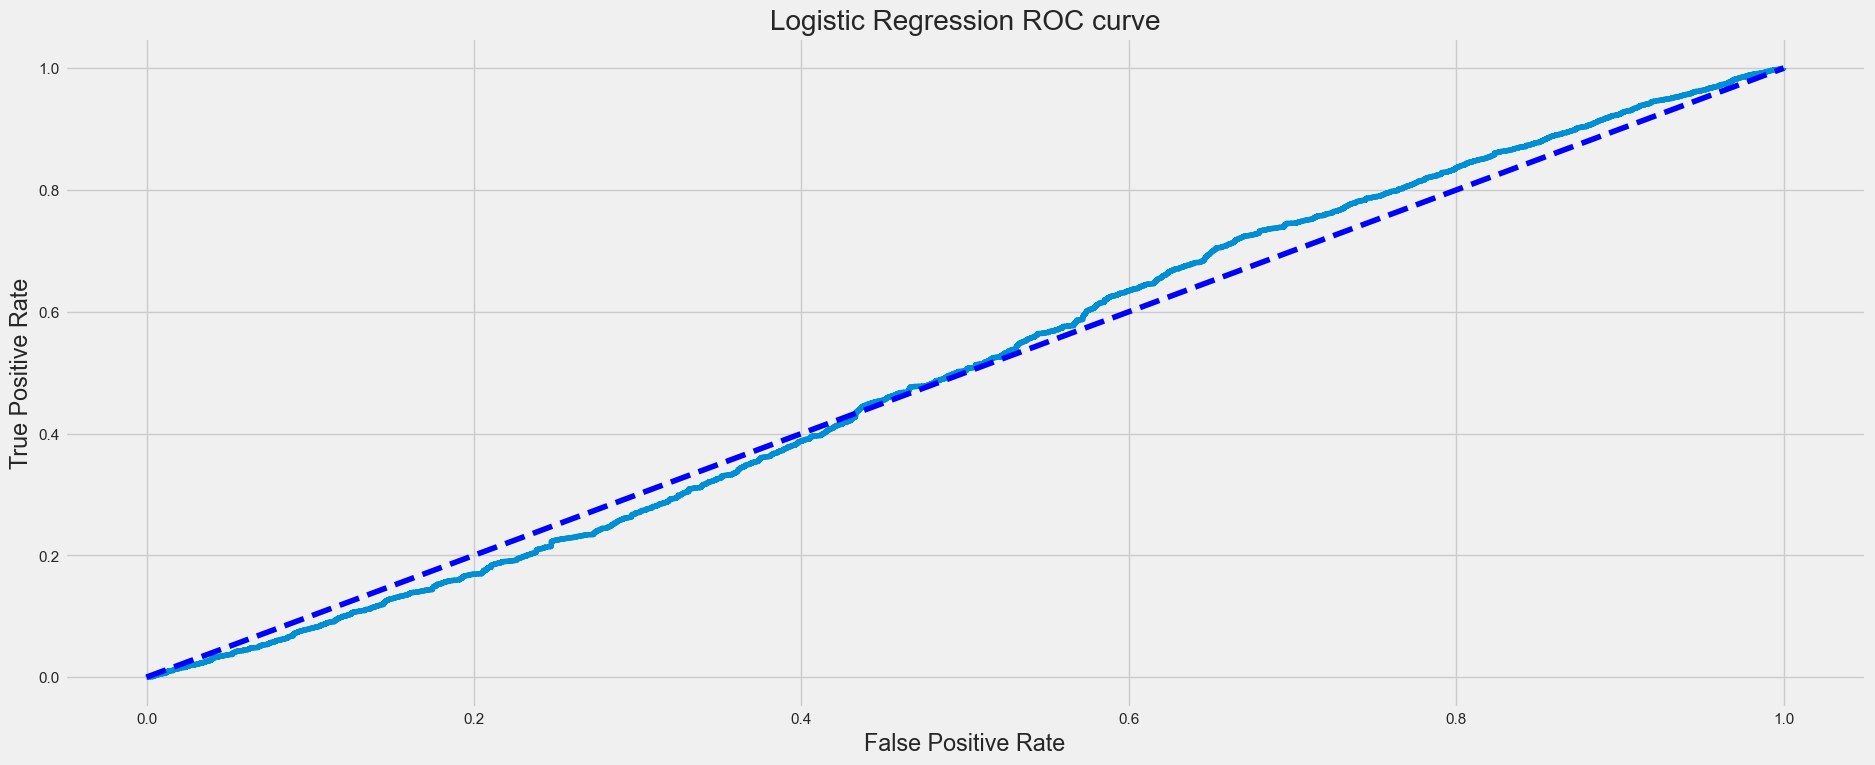

In [244]:
falposr, truposr, _ = roc_curve(y_test, y_pred_lg_prob)
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[23243     0]
 [24011     0]]



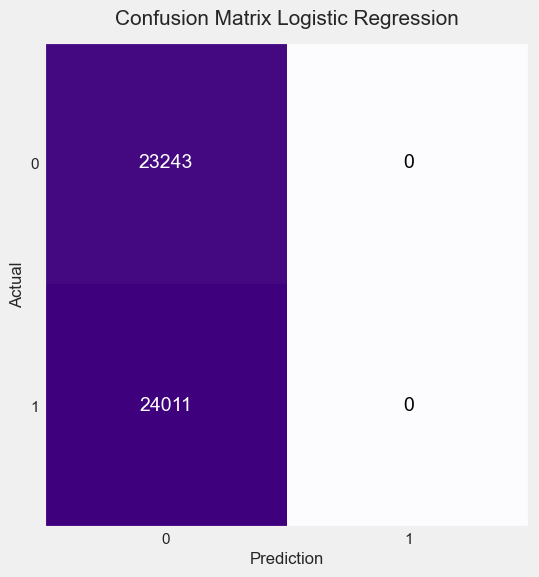

In [245]:
cmlg = confusion_matrix(y_test, y_pred_lg)
print(cmlg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlg, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Logistic Regression', fontsize=15, pad=12)
plt.show()

### Hyperparameter Tuning

In [246]:
parameter = {'C': [float(x) for x in np.linspace(0.0001, 0.05, 100)],'penalty':['l2','l1', 'elasticnet']}
lgmodel2 = GridSearchCV(lg, parameter, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
lgmodel2.fit(X_train, y_train)
lgmodelbest = lgmodel2.best_estimator_
y_pred_lg2 = lgmodelbest.predict(X_test)
y_pred_lg2_prob= lgmodelbest.predict_proba(X_test)[:,1]
eval_classification(lgmodelbest)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


Accuracy (Test Set): 0.49
Accuracy (Train Set): 0.49
Precision (Test Set): 0.00
Precision (Train Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.51
roc_auc (crossval train): 0.9999999998236154
roc_auc (crossval test): 0.8897389293545054


### **K-Nearest Neighbor**

---

In [247]:
knnmodel = knn.fit(X_train, y_train)
eval_classification(knnmodel)

Accuracy (Test Set): 0.75
Accuracy (Train Set): 0.83
Precision (Test Set): 0.80
Precision (Train Set): 0.88
Recall (Test Set): 0.69
Recall (Train Set): 0.78
F1-Score (Test Set): 0.74
F1-Score (Train Set): 0.83
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9999999996472315
roc_auc (crossval test): 0.8897190759941502


In [248]:
y_pred_knn_prob = knnmodel.predict_proba(X_test)[:,1]
y_pred_knn = knnmodel.predict(X_test)

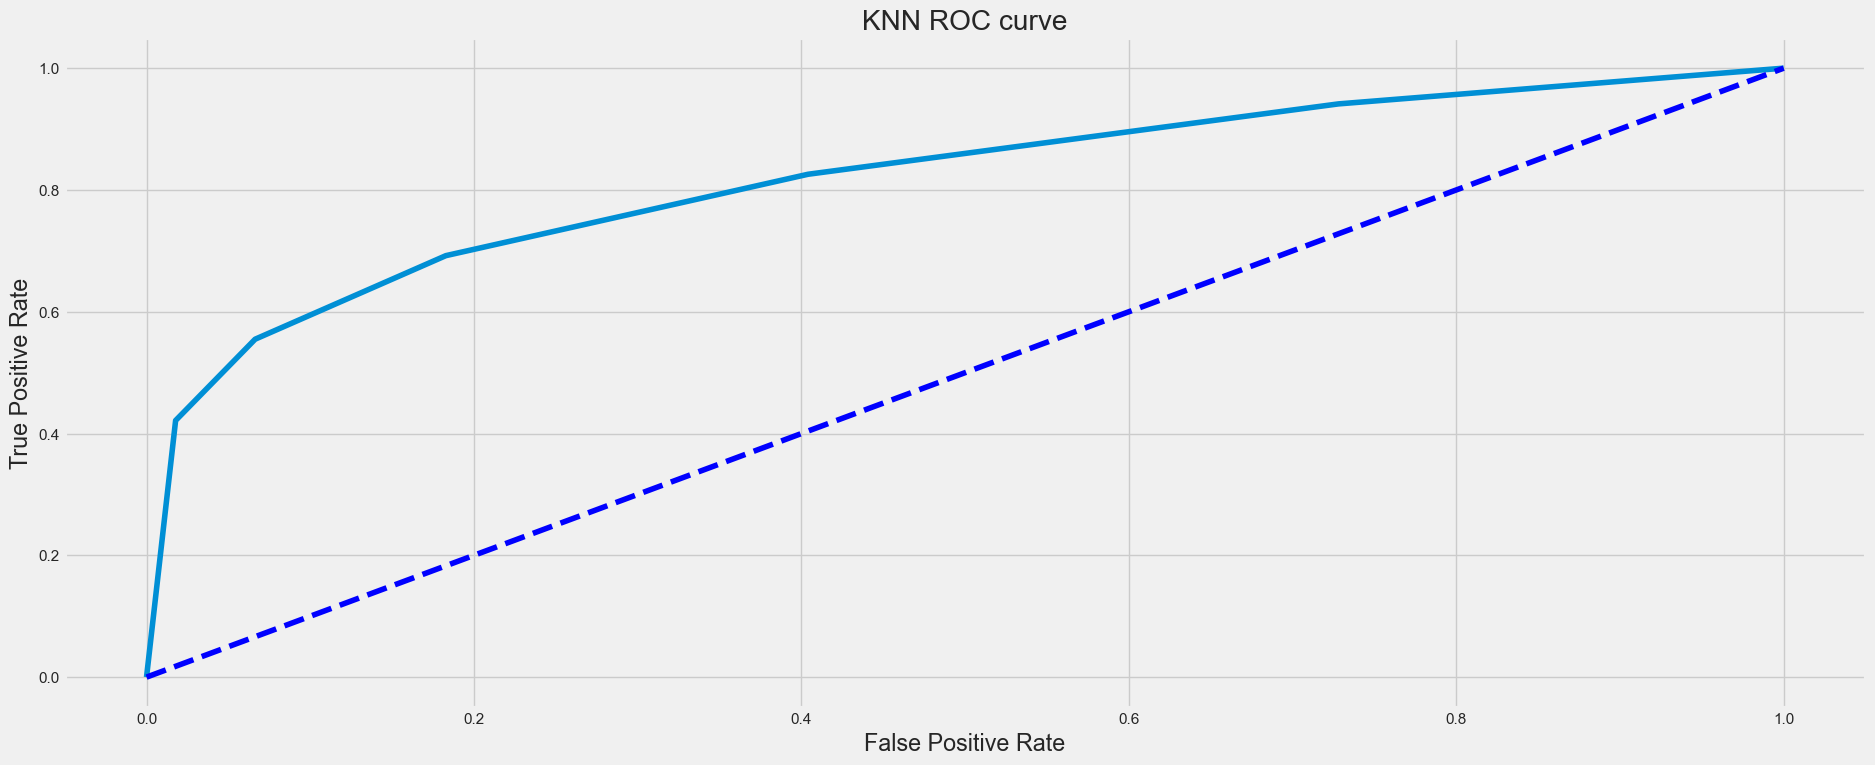

In [249]:
falposr, truposr, _ = roc_curve(y_test, y_pred_knn_prob)
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[18993  4250]
 [ 7392 16619]]



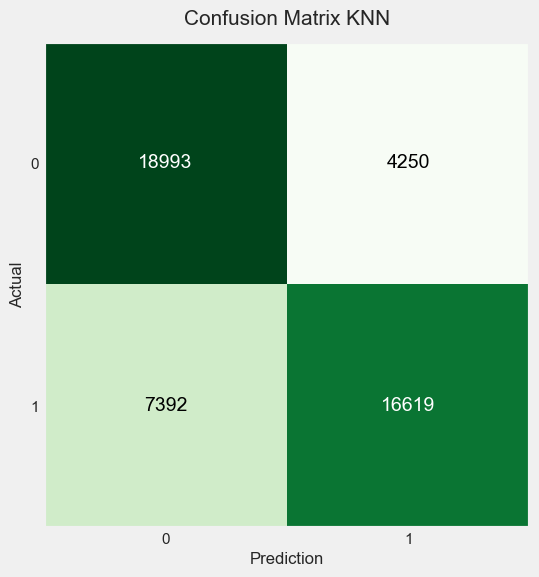

In [250]:
cmknn = confusion_matrix(y_test, y_pred_knn)
print(cmknn)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmknn, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix KNN', fontsize=15, pad=12)
plt.show()

### Hyperparameter Tuning

In [251]:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knnmodel = knn.fit(X_train, y_train)
knnrs = RandomizedSearchCV(knnmodel, hyperparameters, scoring='accuracy', random_state=99, cv=5)
knnrs.fit(X_train, y_train)
knnmodelbest = knnrs.best_estimator_
eval_classification(knnmodelbest)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.87
Precision (Test Set): 0.87
Precision (Train Set): 1.00
Recall (Test Set): 0.61
Recall (Train Set): 0.75
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.86
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9999999998992088
roc_auc (crossval test): 0.8898974458050816


### **Decision Tree**

---

In [252]:
dtmodel = dt.fit(X_train, y_train)
eval_classification(dtmodel)

Accuracy (Test Set): 0.73
Accuracy (Train Set): 1.00
Precision (Test Set): 0.73
Precision (Train Set): 1.00
Recall (Test Set): 0.74
Recall (Train Set): 1.00
F1-Score (Test Set): 0.73
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.73
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999999996472324
roc_auc (crossval test): 0.8900540402154291


In [253]:
y_pred_dt_prob = dtmodel.predict_proba(X_test)[:,1]
y_pred_dt = dtmodel.predict(X_test)

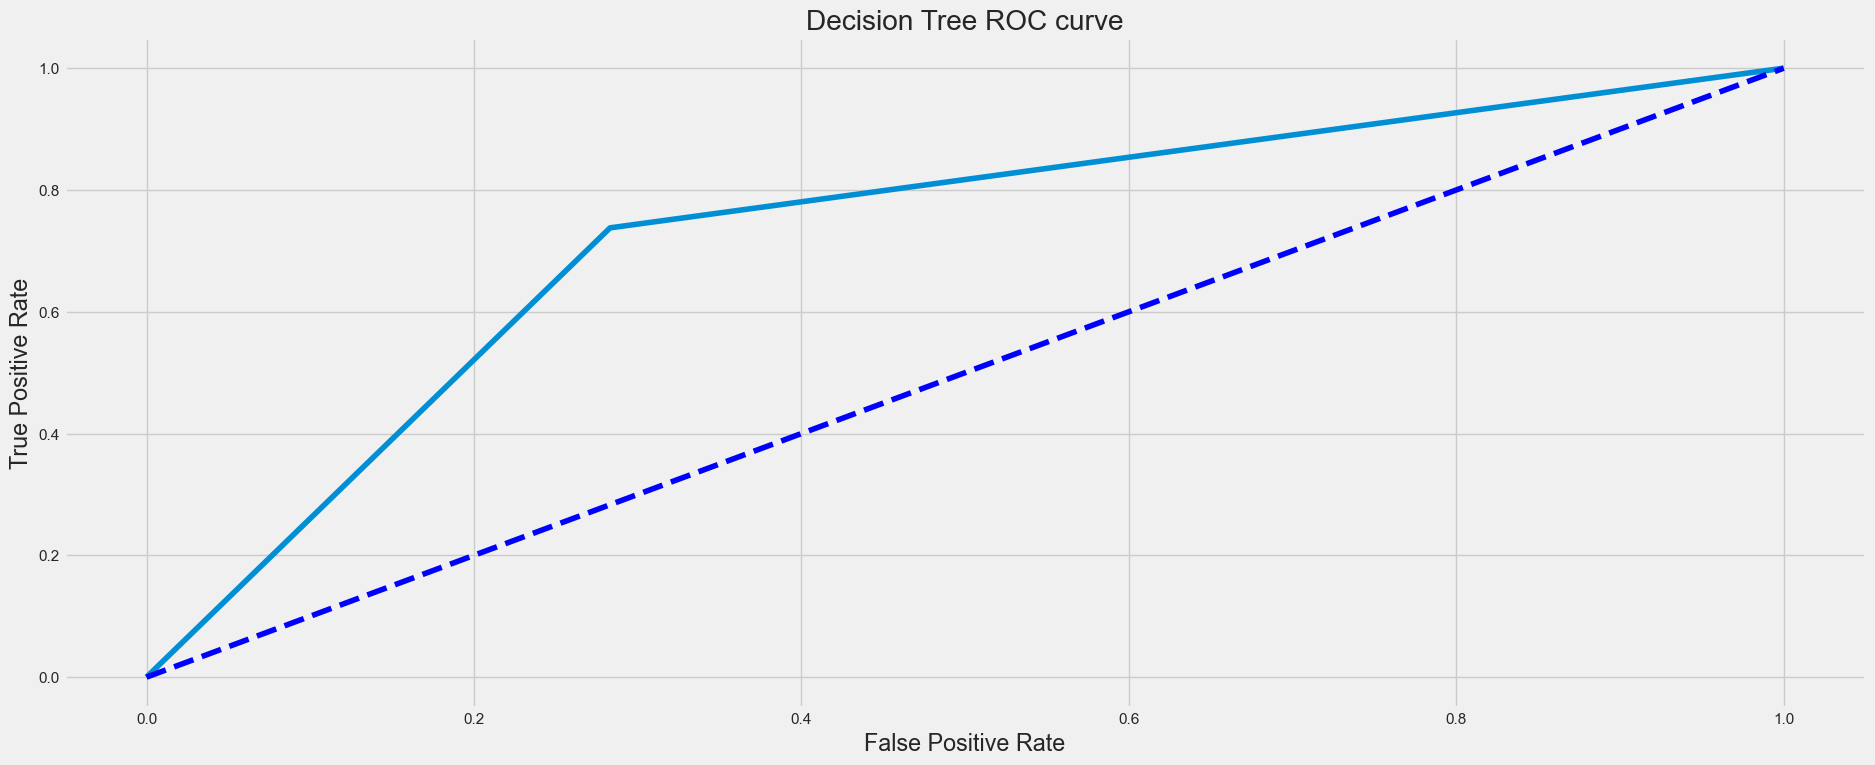

In [254]:
falposr, truposr, _ = roc_curve(y_test, y_pred_dt_prob)
plt.title('Decision Tree ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[16662  6581]
 [ 6296 17715]]



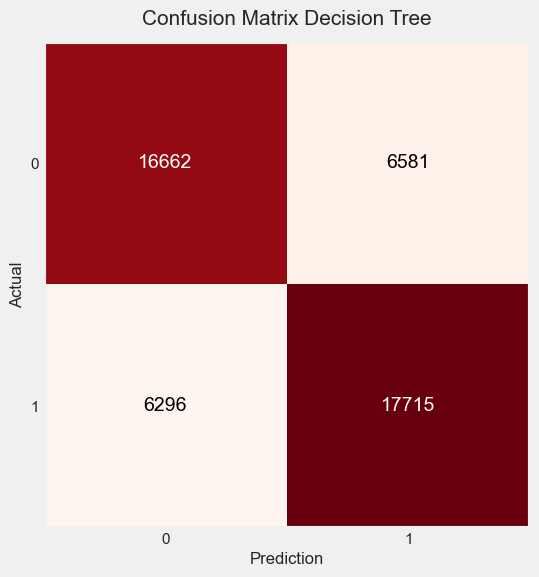

In [255]:
cmdt = confusion_matrix(y_test, y_pred_dt)
print(cmdt)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmdt, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Decision Tree', fontsize=15, pad=12)
plt.show()

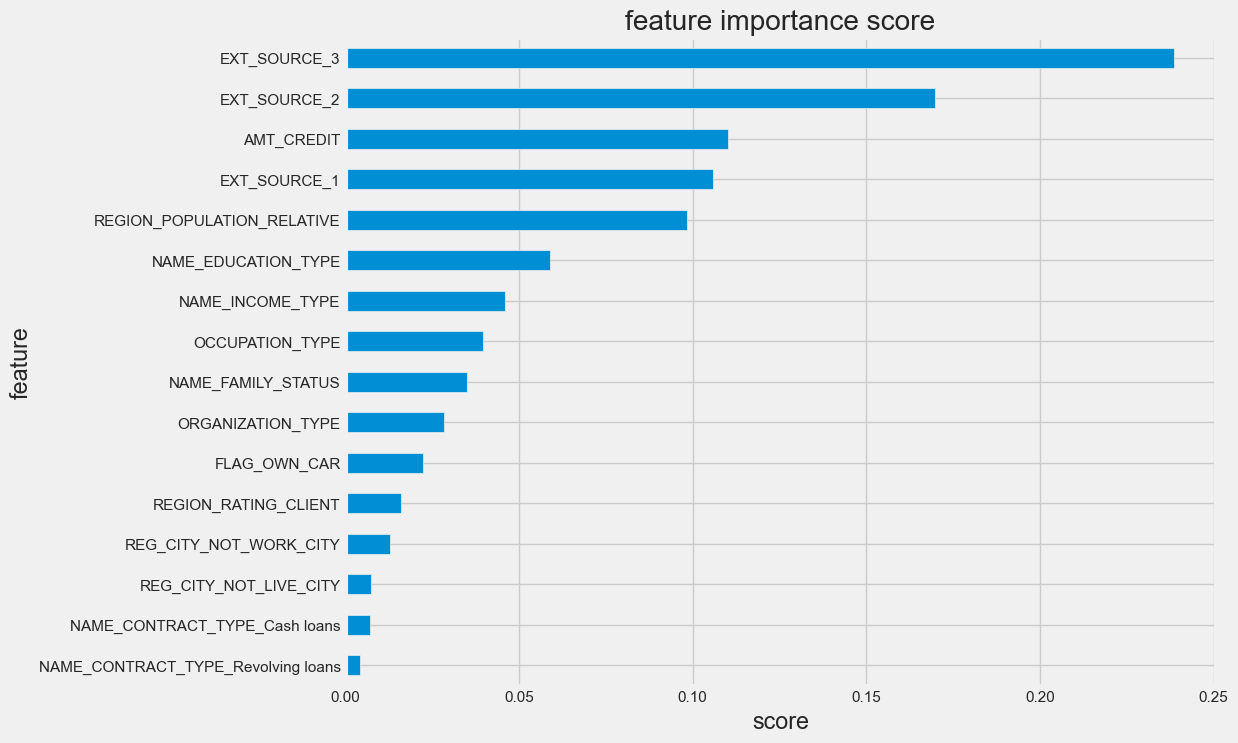

In [256]:
show_feature_importance(dtmodel)

### Hyperparameter Tuning

In [257]:
parameter = {
            'max_depth':[int(x) for x in np.linspace(1, 110, num = 30)],
            'min_samples_split':[2, 5, 10, 100],
            'max_features':['auto', 'sqrt'],
            'criterion':['gini','entropy'],
            'splitter':['best','random']}

dtmodel2 = GridSearchCV(dt, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='accuracy')
dtmodel2.fit(X_train, y_train)
dtmodelbest = dtmodel2.best_estimator_
y_pred_dt2 = dtmodelbest.predict(X_test)
y_pred_dt2_prob= dtmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


In [258]:
eval_classification(dtmodelbest)

Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.81
Precision (Test Set): 0.81
Precision (Train Set): 0.85
Recall (Test Set): 0.73
Recall (Train Set): 0.77
F1-Score (Test Set): 0.76
F1-Score (Train Set): 0.81
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.90


roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.8900101401898771


### **XGBoost**

---

In [259]:
xgmodel = xgb.fit(X_train, y_train)
eval_classification(xgmodel)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.86
Precision (Test Set): 0.89
Precision (Train Set): 0.91
Recall (Test Set): 0.78
Recall (Train Set): 0.80
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.85
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.94


roc_auc (crossval train): 0.9999999987149197
roc_auc (crossval test): 0.8902642517587089


In [260]:
y_pred_xg_prob = xgmodel.predict_proba(X_test)[:,1]
y_pred_xg = xgmodel.predict(X_test)

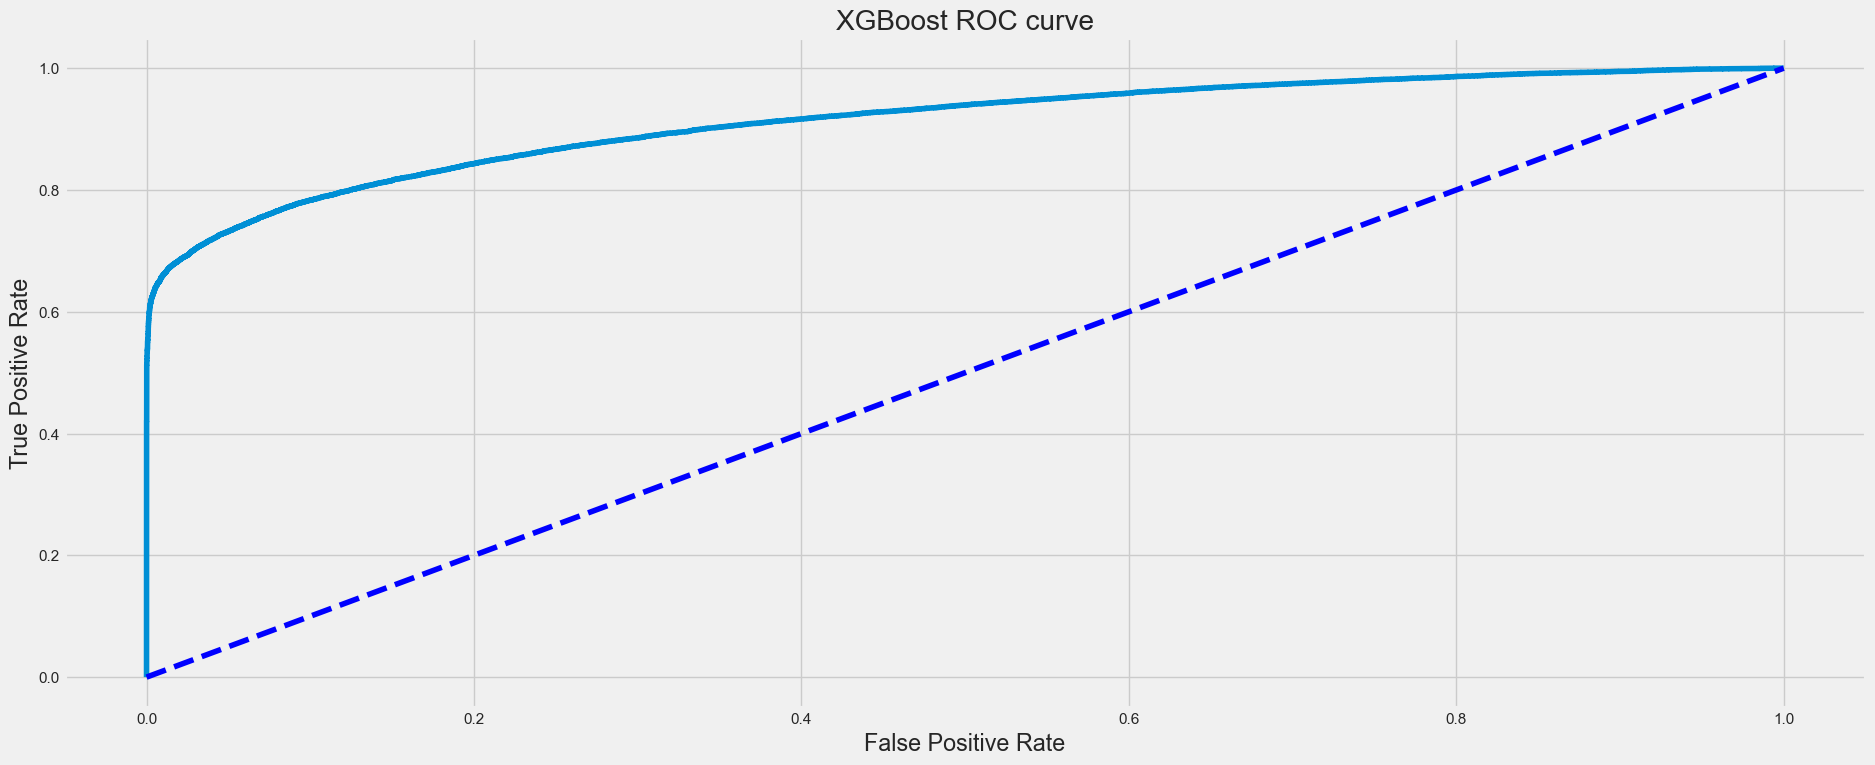

In [261]:
falposr, truposr, _ = roc_curve(y_test, y_pred_xg_prob)
plt.title('XGBoost ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[21006  2237]
 [ 5271 18740]]



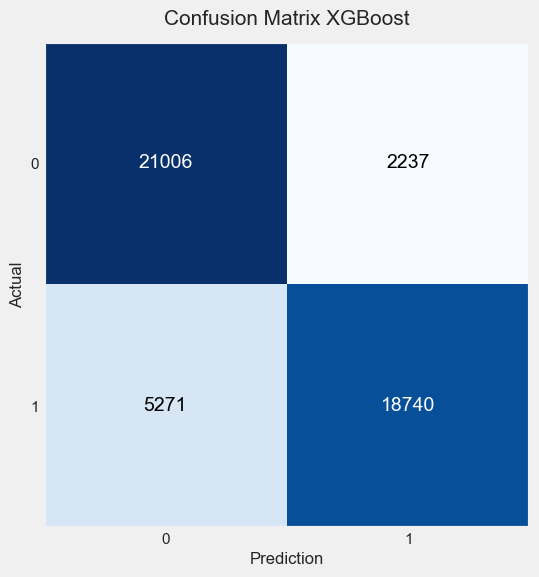

In [262]:
cmxg = confusion_matrix(y_test, y_pred_xg)
print(cmxg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmxg, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix XGBoost', fontsize=15, pad=12)
plt.show()

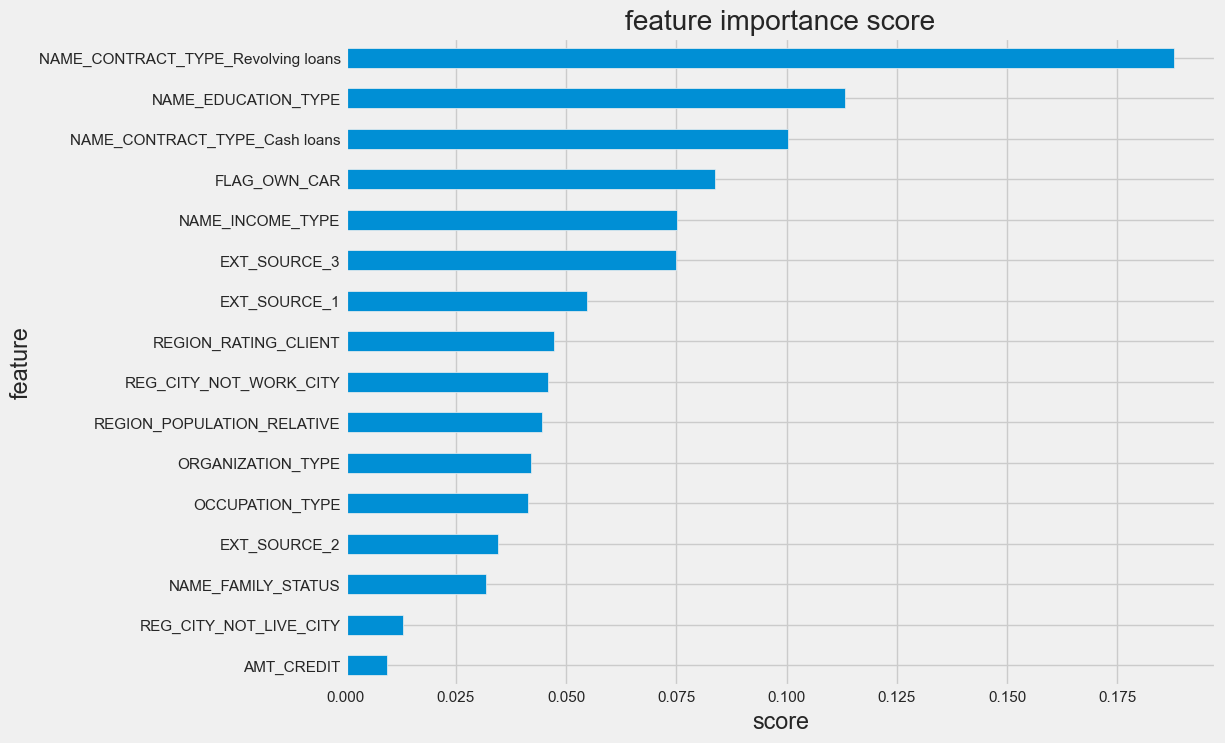

In [263]:
show_feature_importance(xgmodel)

### Hyperparameter Tuning

In [264]:
parameter = {
            'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
            'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
            'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'tree_method' : ['auto', 'exact', 'approx', 'hist'],
            'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
            'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
            }

xgmodel2 = RandomizedSearchCV(xgb, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='accuracy', random_state=99)
xgmodel2.fit(X_train,y_train)
xgmodelbest = xgmodel2.best_estimator_
y_pred_xg2 = xgmodelbest.predict(X_test)
y_pred_xg2_prob= xgmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [265]:
eval_classification(xgmodelbest)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.86
Precision (Test Set): 0.94
Precision (Train Set): 0.94
Recall (Test Set): 0.77
Recall (Train Set): 0.77
F1-Score (Test Set): 0.85
F1-Score (Train Set): 0.85
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


roc_auc (crossval train): 0.999999999874011
roc_auc (crossval test): 0.8899437736997771


### **Random Forest**

---

In [266]:
rfmodel = rf.fit(X_train, y_train)
eval_classification(rfmodel)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 1.00
Precision (Test Set): 0.85
Precision (Train Set): 1.00
Recall (Test Set): 0.78
Recall (Train Set): 1.00
F1-Score (Test Set): 0.81
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999999997984208
roc_auc (crossval test): 0.8897580977761919


In [267]:
y_pred_rf_prob = rfmodel.predict_proba(X_test)[:,1]
y_pred_rf = rfmodel.predict(X_test)

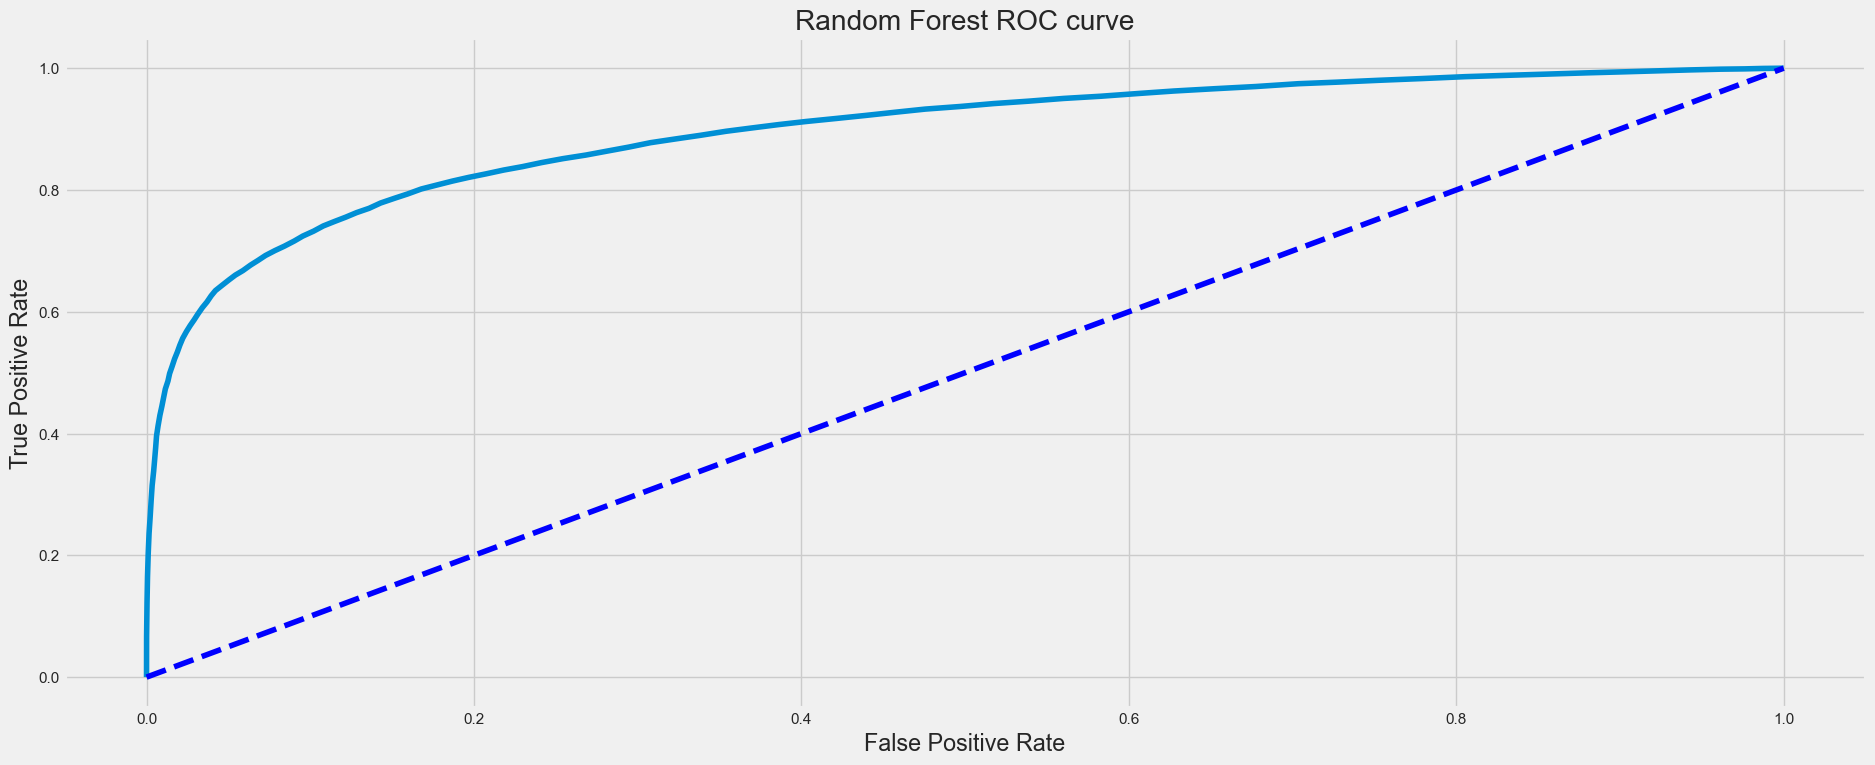

In [268]:
falposr, truposr, _ = roc_curve(y_test, y_pred_rf_prob)
plt.title('Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[19919  3324]
 [ 5316 18695]]



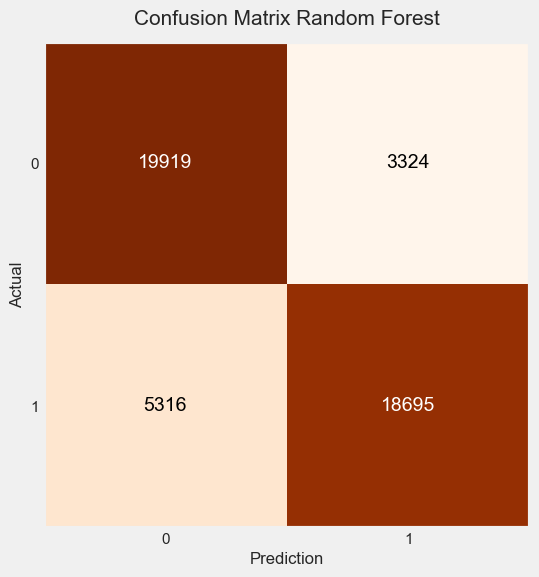

In [269]:
cmrf = confusion_matrix(y_test, y_pred_rf)
print(cmrf)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmrf, figsize=(6, 6), cmap=plt.cm.Oranges)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Random Forest', fontsize=15, pad=12)
plt.show()

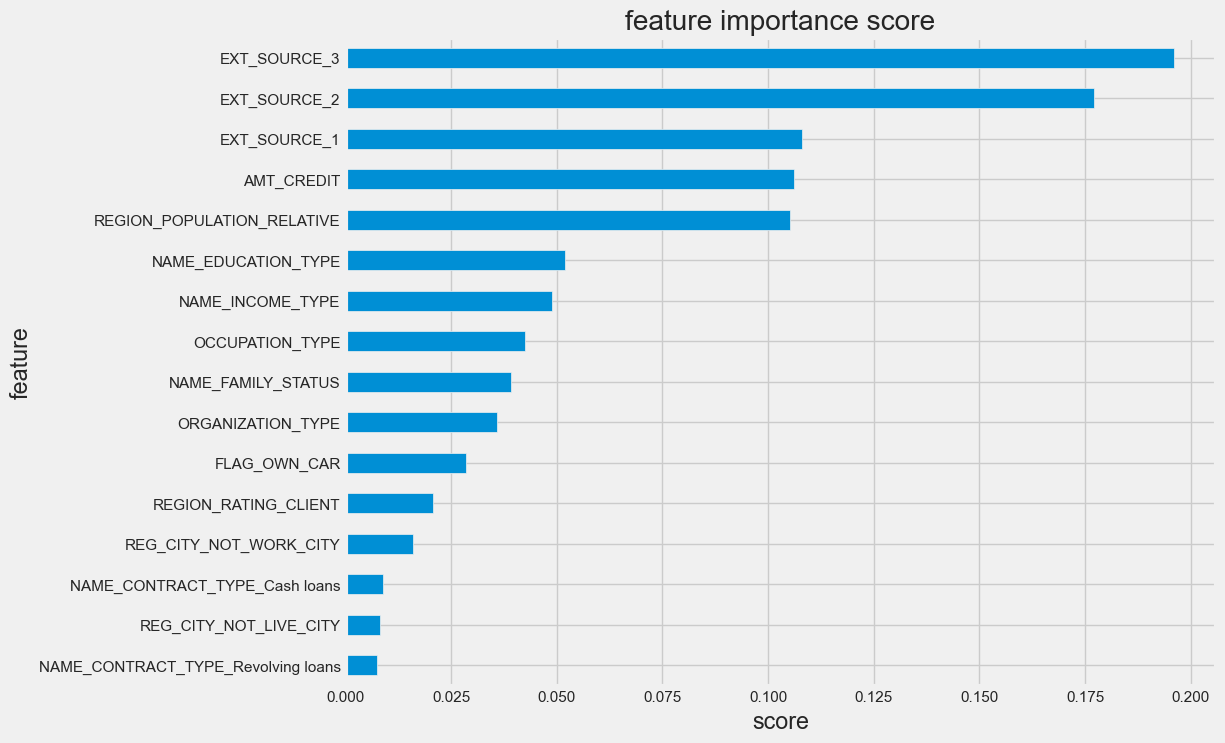

In [270]:
show_feature_importance(rfmodel)

### Hyperparameter Tuning

In [271]:
parameter = {'n_estimators': [int(x) for x in np.linspace(1, 200, 50)],
            'criterion': ['gini', 'entropy'],
            'max_depth': [int(x) for x in np.linspace(2, 100, 50)],
            'min_samples_split': [int(x) for x in np.linspace(2, 20, 10)],
            'min_samples_leaf': [int(x) for x in np.linspace(2, 20, 10)]}

rsmodel2 = RandomizedSearchCV(rf, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='accuracy', random_state=99)
rsmodel2.fit(X_train,y_train)
rsmodelbest = rsmodel2.best_estimator_
y_pred_rs2 = rsmodelbest.predict(X_test)
y_pred_rs2_prob= rsmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [272]:
eval_classification(rsmodelbest)

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.91
Precision (Test Set): 0.85
Precision (Train Set): 0.94
Recall (Test Set): 0.77
Recall (Train Set): 0.88
F1-Score (Test Set): 0.81
F1-Score (Train Set): 0.91
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9999999996472309
roc_auc (crossval test): 0.889761452687087


### **LightGBM**

---

In [273]:
lgbmodel = lgb.fit(X_train, y_train)
print('')
eval_classification(lgbmodel)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 56014, number of negative: 54245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 110259, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508022 -> initscore=0.032091
[LightGBM] [Info] Start training from score 0.032091

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.85
Precision (Test Set): 0.90
Precision (Train Set): 0.90
Recall (Test Set): 0.78
Recall (Train Set): 0.79
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


roc_auc (crossval train): 0.9999999999244066
roc_auc (crossval test): 0.8895310335410667


In [274]:
y_pred_lgb_prob = lgbmodel.predict_proba(X_test)[:,1]
y_pred_lgb = lgbmodel.predict(X_test)

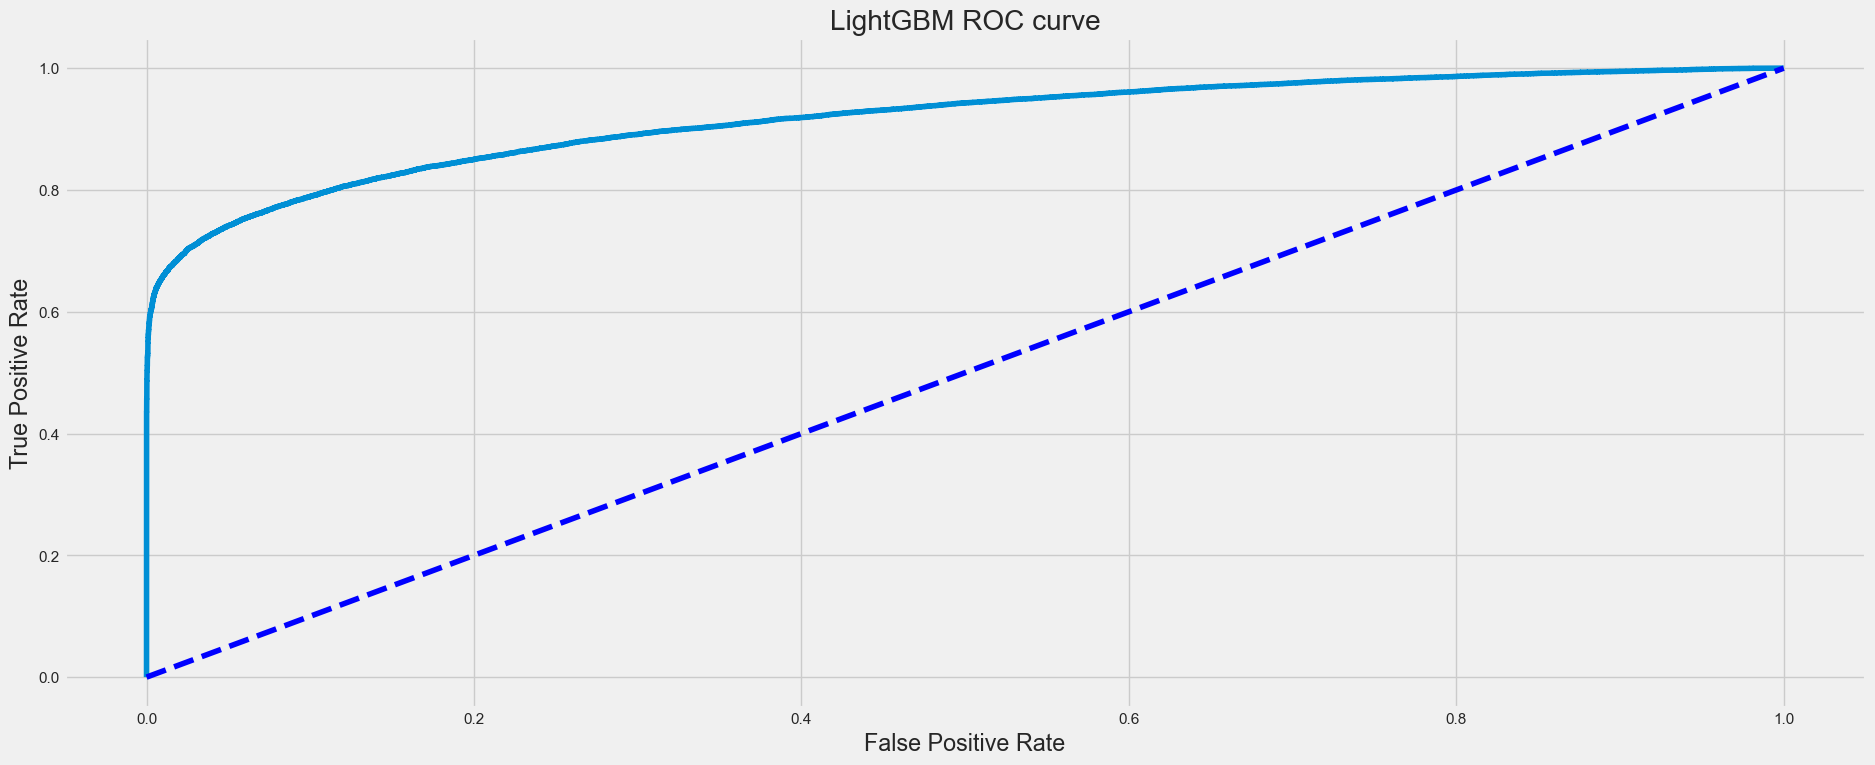

In [275]:
falposr, truposr, _ = roc_curve(y_test, y_pred_lgb_prob)
plt.title('LightGBM ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[21102  2141]
 [ 5201 18810]]



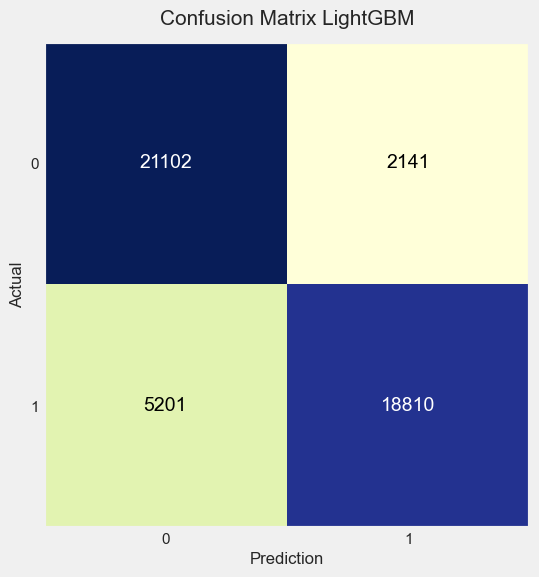

In [276]:
cmlgb = confusion_matrix(y_test, y_pred_lgb)
print(cmlgb)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlgb, figsize=(6, 6), cmap=plt.cm.YlGnBu)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix LightGBM', fontsize=15, pad=12)
plt.show()

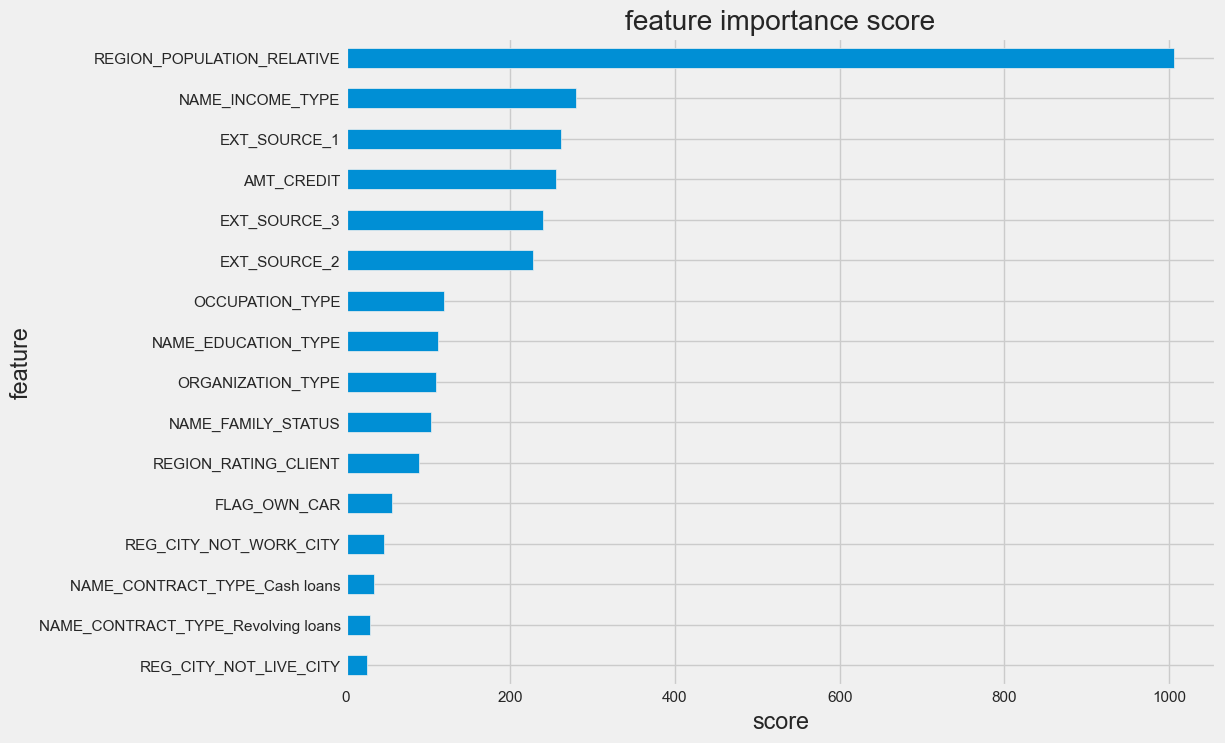

In [277]:
show_feature_importance(lgbmodel)

### Hyperparameter Tuning

In [278]:
f2 = make_scorer(fbeta_score, beta =2)
parameter = {"n_estimators":[200,300,400],
             "max_depth":[3,5,9],
             "num_leaves":[20,120],
             "learning_rate":[0.01,0.1],
             "min_child_samples":[10,50]}
lgbmodel2 = HalvingGridSearchCV(lgb, parameter, scoring = f2, cv=3, n_jobs = -1, verbose = 1)
lgbmodel2.fit(X_train,y_train)
lgbmodel2.best_params_, lgbmodel2.best_score_
lgbmodelbest = LGBMClassifier(**lgbmodel2.best_params_)
lgbmodelbest.fit(X_train, y_train)
y_pred_lgb2 = lgbmodelbest.predict(X_test)
y_pred_lgb2_prob = lgbmodelbest.predict_proba(X_test)[:,1]

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 4083
max_resources_: 110259
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 4083
Fitting 3 folds for each of 72 candidates, totalling 216 fits


----------
iter: 1
n_candidates: 24
n_resources: 12249
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 2
n_candidates: 8
n_resources: 36747
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 3
n_resources: 110241
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 56014, number of negative: 54245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 110259, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508022 -> initscore=0.032091
[LightGBM] [Info] Start training from score 0.032091
[LightGBM] [Warning

In [279]:
eval_classification(lgbmodelbest)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.85
Precision (Test Set): 0.90
Precision (Train Set): 0.90
Recall (Test Set): 0.79
Recall (Train Set): 0.79
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


roc_auc (crossval train): 0.9999999998992092
roc_auc (crossval test): 0.8898173192608156


### **Gradient Boost**

---

In [280]:
grdmodel = grd.fit(X_train, y_train)
eval_classification(grdmodel)

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.81
Precision (Test Set): 0.83
Precision (Train Set): 0.83
Recall (Test Set): 0.79
Recall (Train Set): 0.79
F1-Score (Test Set): 0.81
F1-Score (Train Set): 0.81
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.9999999999244066
roc_auc (crossval test): 0.889981095383126


In [281]:
y_pred_grd_prob = grdmodel.predict_proba(X_test)[:,1]
y_pred_grd = grdmodel.predict(X_test)

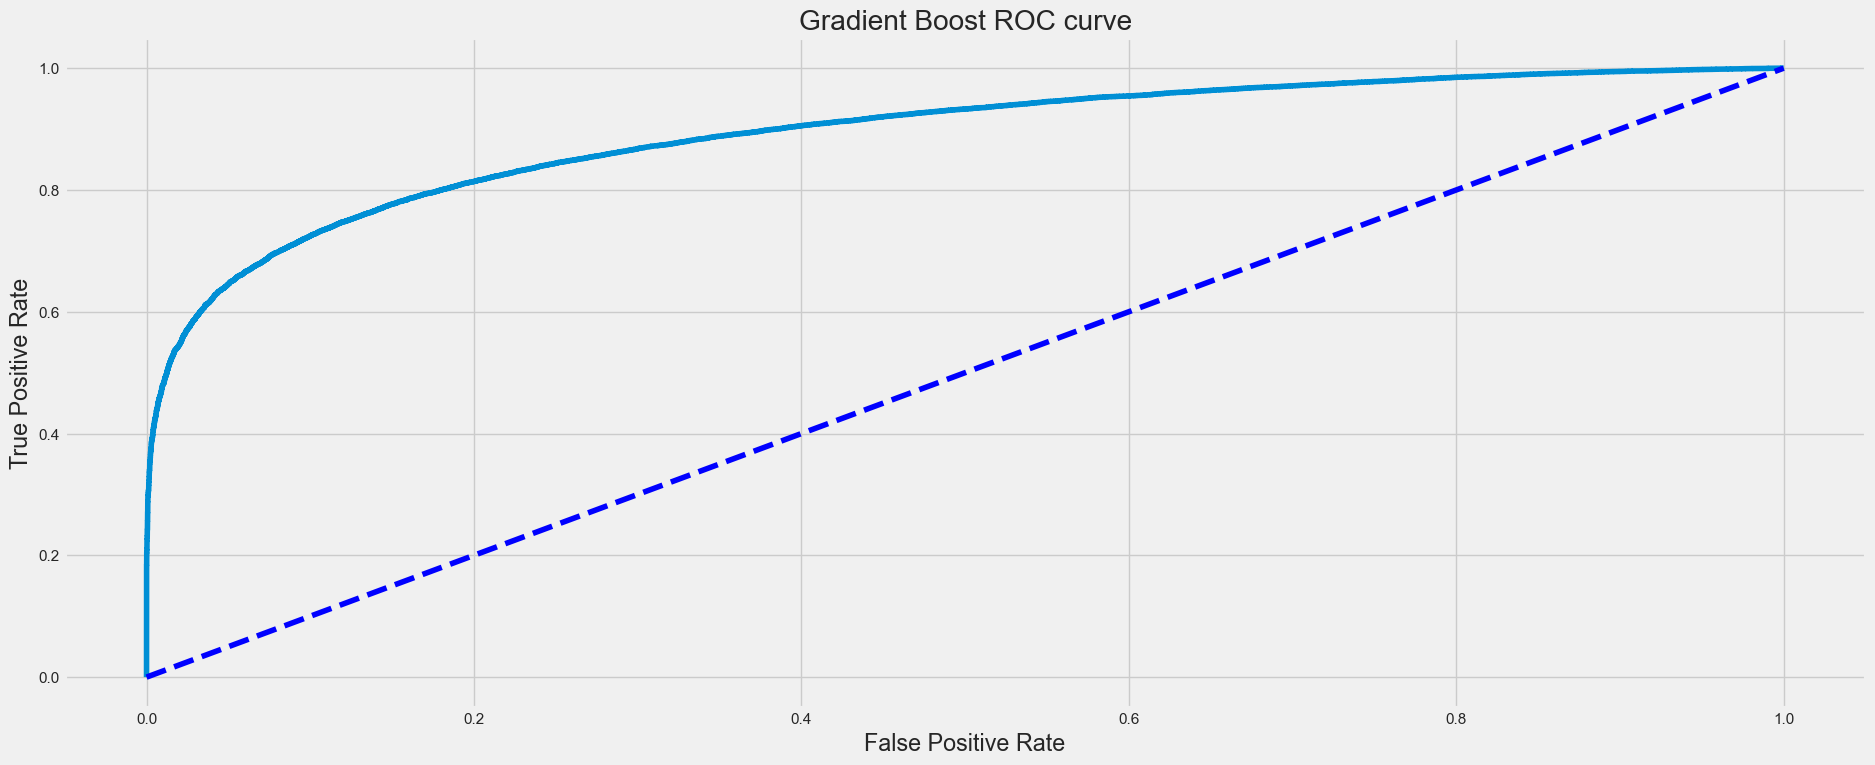

In [282]:
falposr, truposr, _ = roc_curve(y_test, y_pred_grd_prob)
plt.title('Gradient Boost ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[19403  3840]
 [ 5060 18951]]



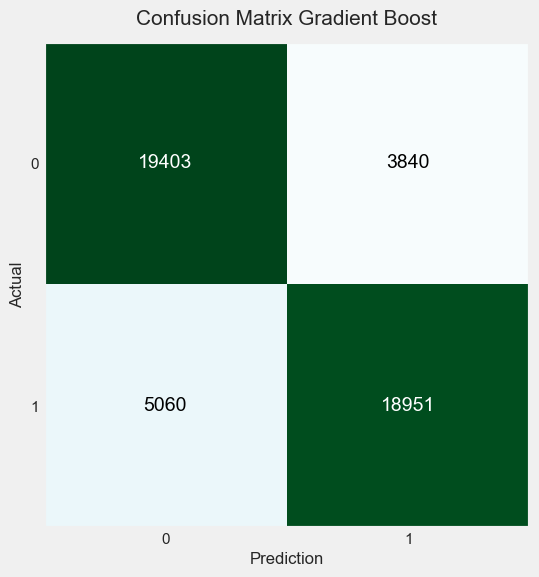

In [283]:
cmgrd = confusion_matrix(y_test, y_pred_grd)
print(cmgrd)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmgrd, figsize=(6, 6), cmap=plt.cm.BuGn)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Gradient Boost', fontsize=15, pad=12)
plt.show()

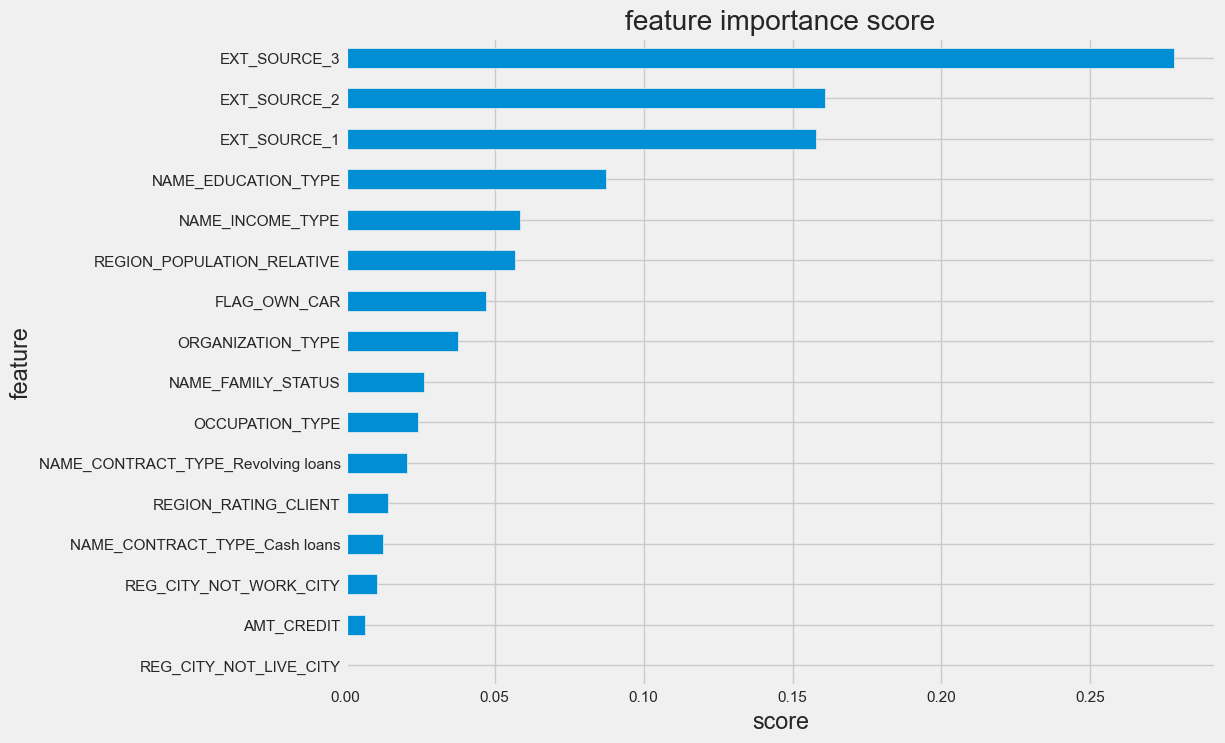

In [284]:
show_feature_importance(grdmodel)

In [285]:
parameter = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],
             'max_depth':[3,4,5,6,7,8],
             'min_samples_split':[2,3,4,5],
             'min_samples_leaf':[1,2],
             'max_features':['sqrt','auto']}

grdmodel2 = RandomizedSearchCV(grd, parameter, scoring='accuracy', n_jobs=-1, cv=3, verbose=1)
grdmodel2.fit(X_train,y_train)
grdmodel2.best_params_, grdmodel2.best_score_
grdmodelbest = GradientBoostingClassifier(**grdmodel2.best_params_)
grdmodelbest.fit(X_train, y_train)
y_pred_grd2 = grdmodelbest.predict(X_test)
y_pred_grd2_prob = grdmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [286]:
eval_classification(grdmodelbest)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.89
Precision (Test Set): 0.92
Precision (Train Set): 0.95
Recall (Test Set): 0.78
Recall (Train Set): 0.82
F1-Score (Test Set): 0.85
F1-Score (Train Set): 0.88
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9999999999748022
roc_auc (crossval test): 0.8897892035876687


>## Conclusion

Model yang dipilih adalah model `XGBoost` yang sudah di tuning parameternya. Metrix utama yang digunakan adalah `ROC-AUC` yang dimana menunjukkan seberapa baik model membedakan antara kelas. Nilai AUC yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk membedakan antara peminjam yang berisiko dan yang tidak, serta `Precision` yang dimana kita tidak ingin **False Positive** tinggi atau mengurangi **False Positive** sekecil-kecilnya ( untuk meminimalkan jumlah peminjam berisiko tinggi yang disetujui ).<br>

>## The Best Fit Model

## `XGBoost Model`

Model ini memiliki score `ROC-AUC` yang tinggi yakni mencapai **0.92** dan `Precision` sebesar **0.94**. Model tidak overfit maupun underfit yang dapat disebut sebagai model ***best fit***.

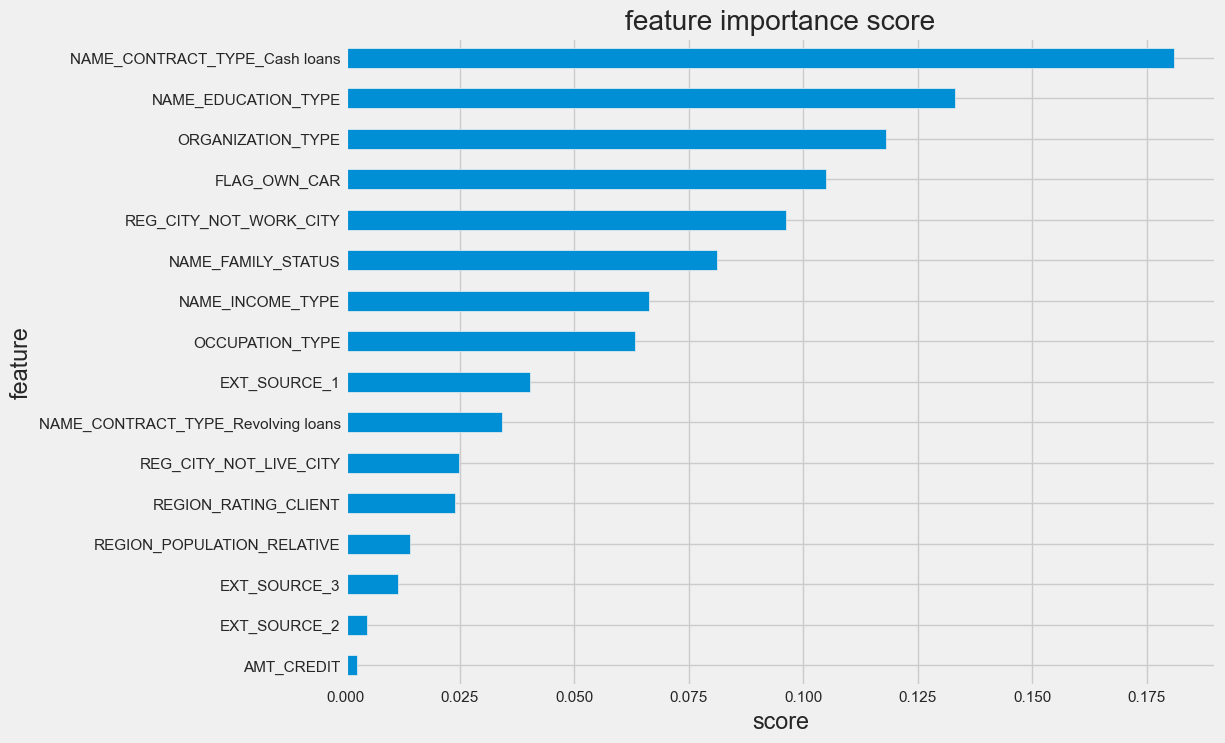

In [287]:
show_feature_importance(xgmodelbest)

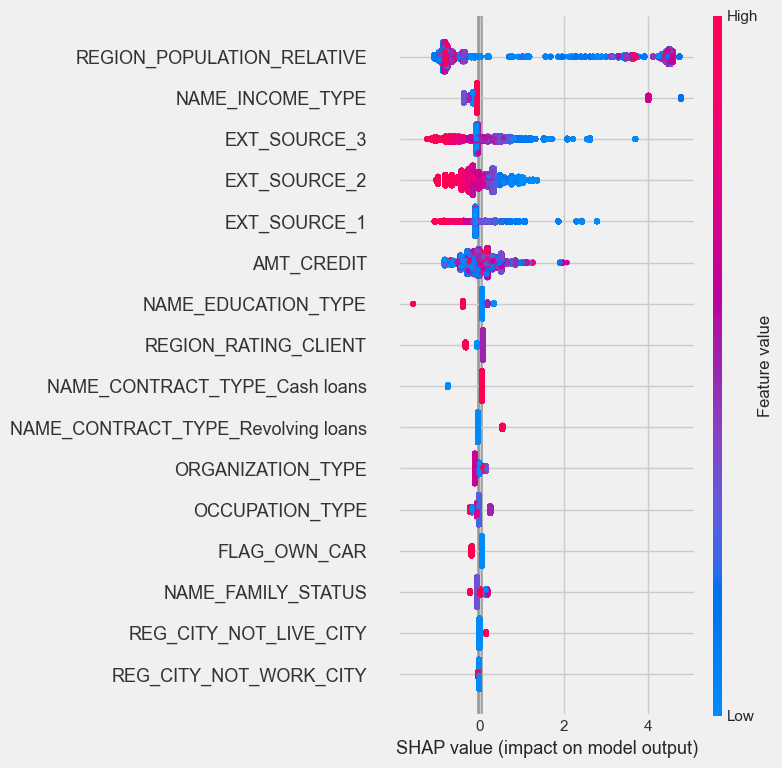

In [288]:
import shap

# Melihat shap value tiap features
explainer = shap.TreeExplainer(xgmodelbest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [294]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[0,:])

>## **Business Recomendations**

- `Penargetan Berdasarkan Tingkat Pendidikan`: tingkat pendidikan memiliki pengaruh yang signifikan terhadap kemungkinan individu memiliki kredit yang baik. Individu dengan tingkat pendidikan yang lebih tinggi umumnya memiliki penghasilan yang lebih tinggi dan stabilitas kerja yang lebih baik, sehingga mereka lebih kecil kemungkinannya untuk gagal membayar pinjaman. <br>
- `Penawaran Kredit Berdasarkan Jumlah Anggota Keluarga`: anggota keluarga memiliki pengaruh terhadap kemungkinan individu memiliki kredit yang baik. Individu dengan jumlah anggota keluarga yang lebih sedikit mungkin memiliki beban keuangan yang lebih ringan dan lebih mampu mengelola pembayaran pinjaman. <br>
- `Mempertimbangkan Ketidakcocokan Tempat Tinggal dan Tempat Kerja`: lokasi tempat tinggal dan tempat kerja individu dapat memengaruhi kemungkinan mereka memiliki kredit yang baik. Individu yang tinggal di wilayah yang sama dengan tempat kerja mereka mungkin lebih mudah diverifikasi dan dianggap memiliki risiko kredit yang lebih rendah. <br>
- `Mempertimbangkan Jenis Pekerjaan`: jenis pekerjaan individu dapat memengaruhi kemungkinan mereka memiliki kredit yang baik. Individu dengan pekerjaan yang stabil dan berpenghasilan tetap mungkin dianggap memiliki risiko kredit yang lebih rendah. <br>
- `Menargetkan Berdasarkan Status Pernikahan`: status pernikahan individu dapat memengaruhi kemungkinan mereka memiliki kredit yang baik. Individu yang menikah mungkin memiliki stabilitas keuangan yang lebih baik dan lebih kecil kemungkinannya untuk gagal membayar pinjaman.